In [36]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import LabelEncoder

In [11]:
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
df = pd.read_csv("//content//gdrive//My Drive//Telco-Customer-Churn.csv")


In [13]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Apparently, there are no missing values. But there is clearly an error. ‘Total Charges’ should be numeric. We have to change that.

In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

There could be missing values if certain values are not recognized after converting a column from string to numeric. Let's see whether this actually occurred.

In [18]:
df['TotalCharges'].isnull().sum()

11

There are now 11 purportedly missing values, however they might mean that the consumer had not paid any fees up until the time the data was collected. The 'tenure' feature shows the duration of a customer's relationship. Assuming we additionally locate 11 customers, let's count the number of samples that have the value '0' for that characteristic and see if their index matches those from the'missing' values.

In [19]:
df['tenure'].isin([0]).sum()

11

In [20]:
print(df[df['tenure'].isin([0])].index)
print(df[df['TotalCharges'].isna()].index)

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


We can set '0' to replace such missing data as we have verifying our suspicions.

In [21]:
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].replace(np.nan,0)
df['TotalCharges'].isnull().sum()

0

checking the possible values of categorical features and viewing descriptive statistics (df.describe) for numerical features.

In [22]:
for col in df.select_dtypes('object').columns:
    print(col, '- # unique values:', df[col].nunique())

customerID - # unique values: 7043
gender - # unique values: 2
Partner - # unique values: 2
Dependents - # unique values: 2
PhoneService - # unique values: 2
MultipleLines - # unique values: 3
InternetService - # unique values: 3
OnlineSecurity - # unique values: 3
OnlineBackup - # unique values: 3
DeviceProtection - # unique values: 3
TechSupport - # unique values: 3
StreamingTV - # unique values: 3
StreamingMovies - # unique values: 3
Contract - # unique values: 3
PaperlessBilling - # unique values: 2
PaymentMethod - # unique values: 4
Churn - # unique values: 2


In [23]:
for col in df.select_dtypes('object').columns:
    print(col, '\n')
    print(df[col].value_counts(), '\n')

customerID 

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 

gender 

Male      3555
Female    3488
Name: gender, dtype: int64 

Partner 

No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup 

No                     3088
Yes                    2429
No internet service    1526
Name: On

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


**Initial EDA**

THE churn variable.

<Axes: >

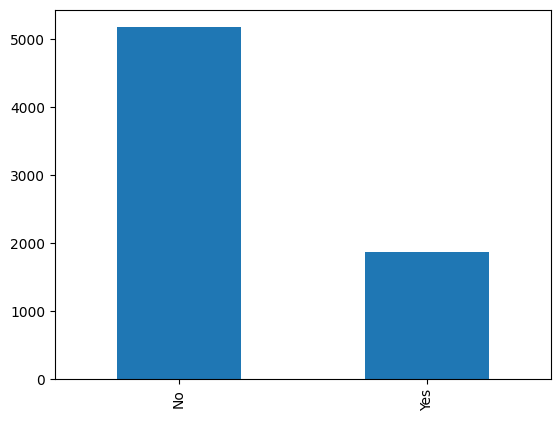

In [25]:
df['Churn'].value_counts().plot(kind="bar")

Examining the response variable, we see that there are roughly 2000 more consumers who are willing to stick with the company's products than those who plan to abandon a service or product, or even break off their relationship altogether, as shown by the barplot below. Thus, around 28% of the dataset's clients are set to leave.

**Numerical Features**

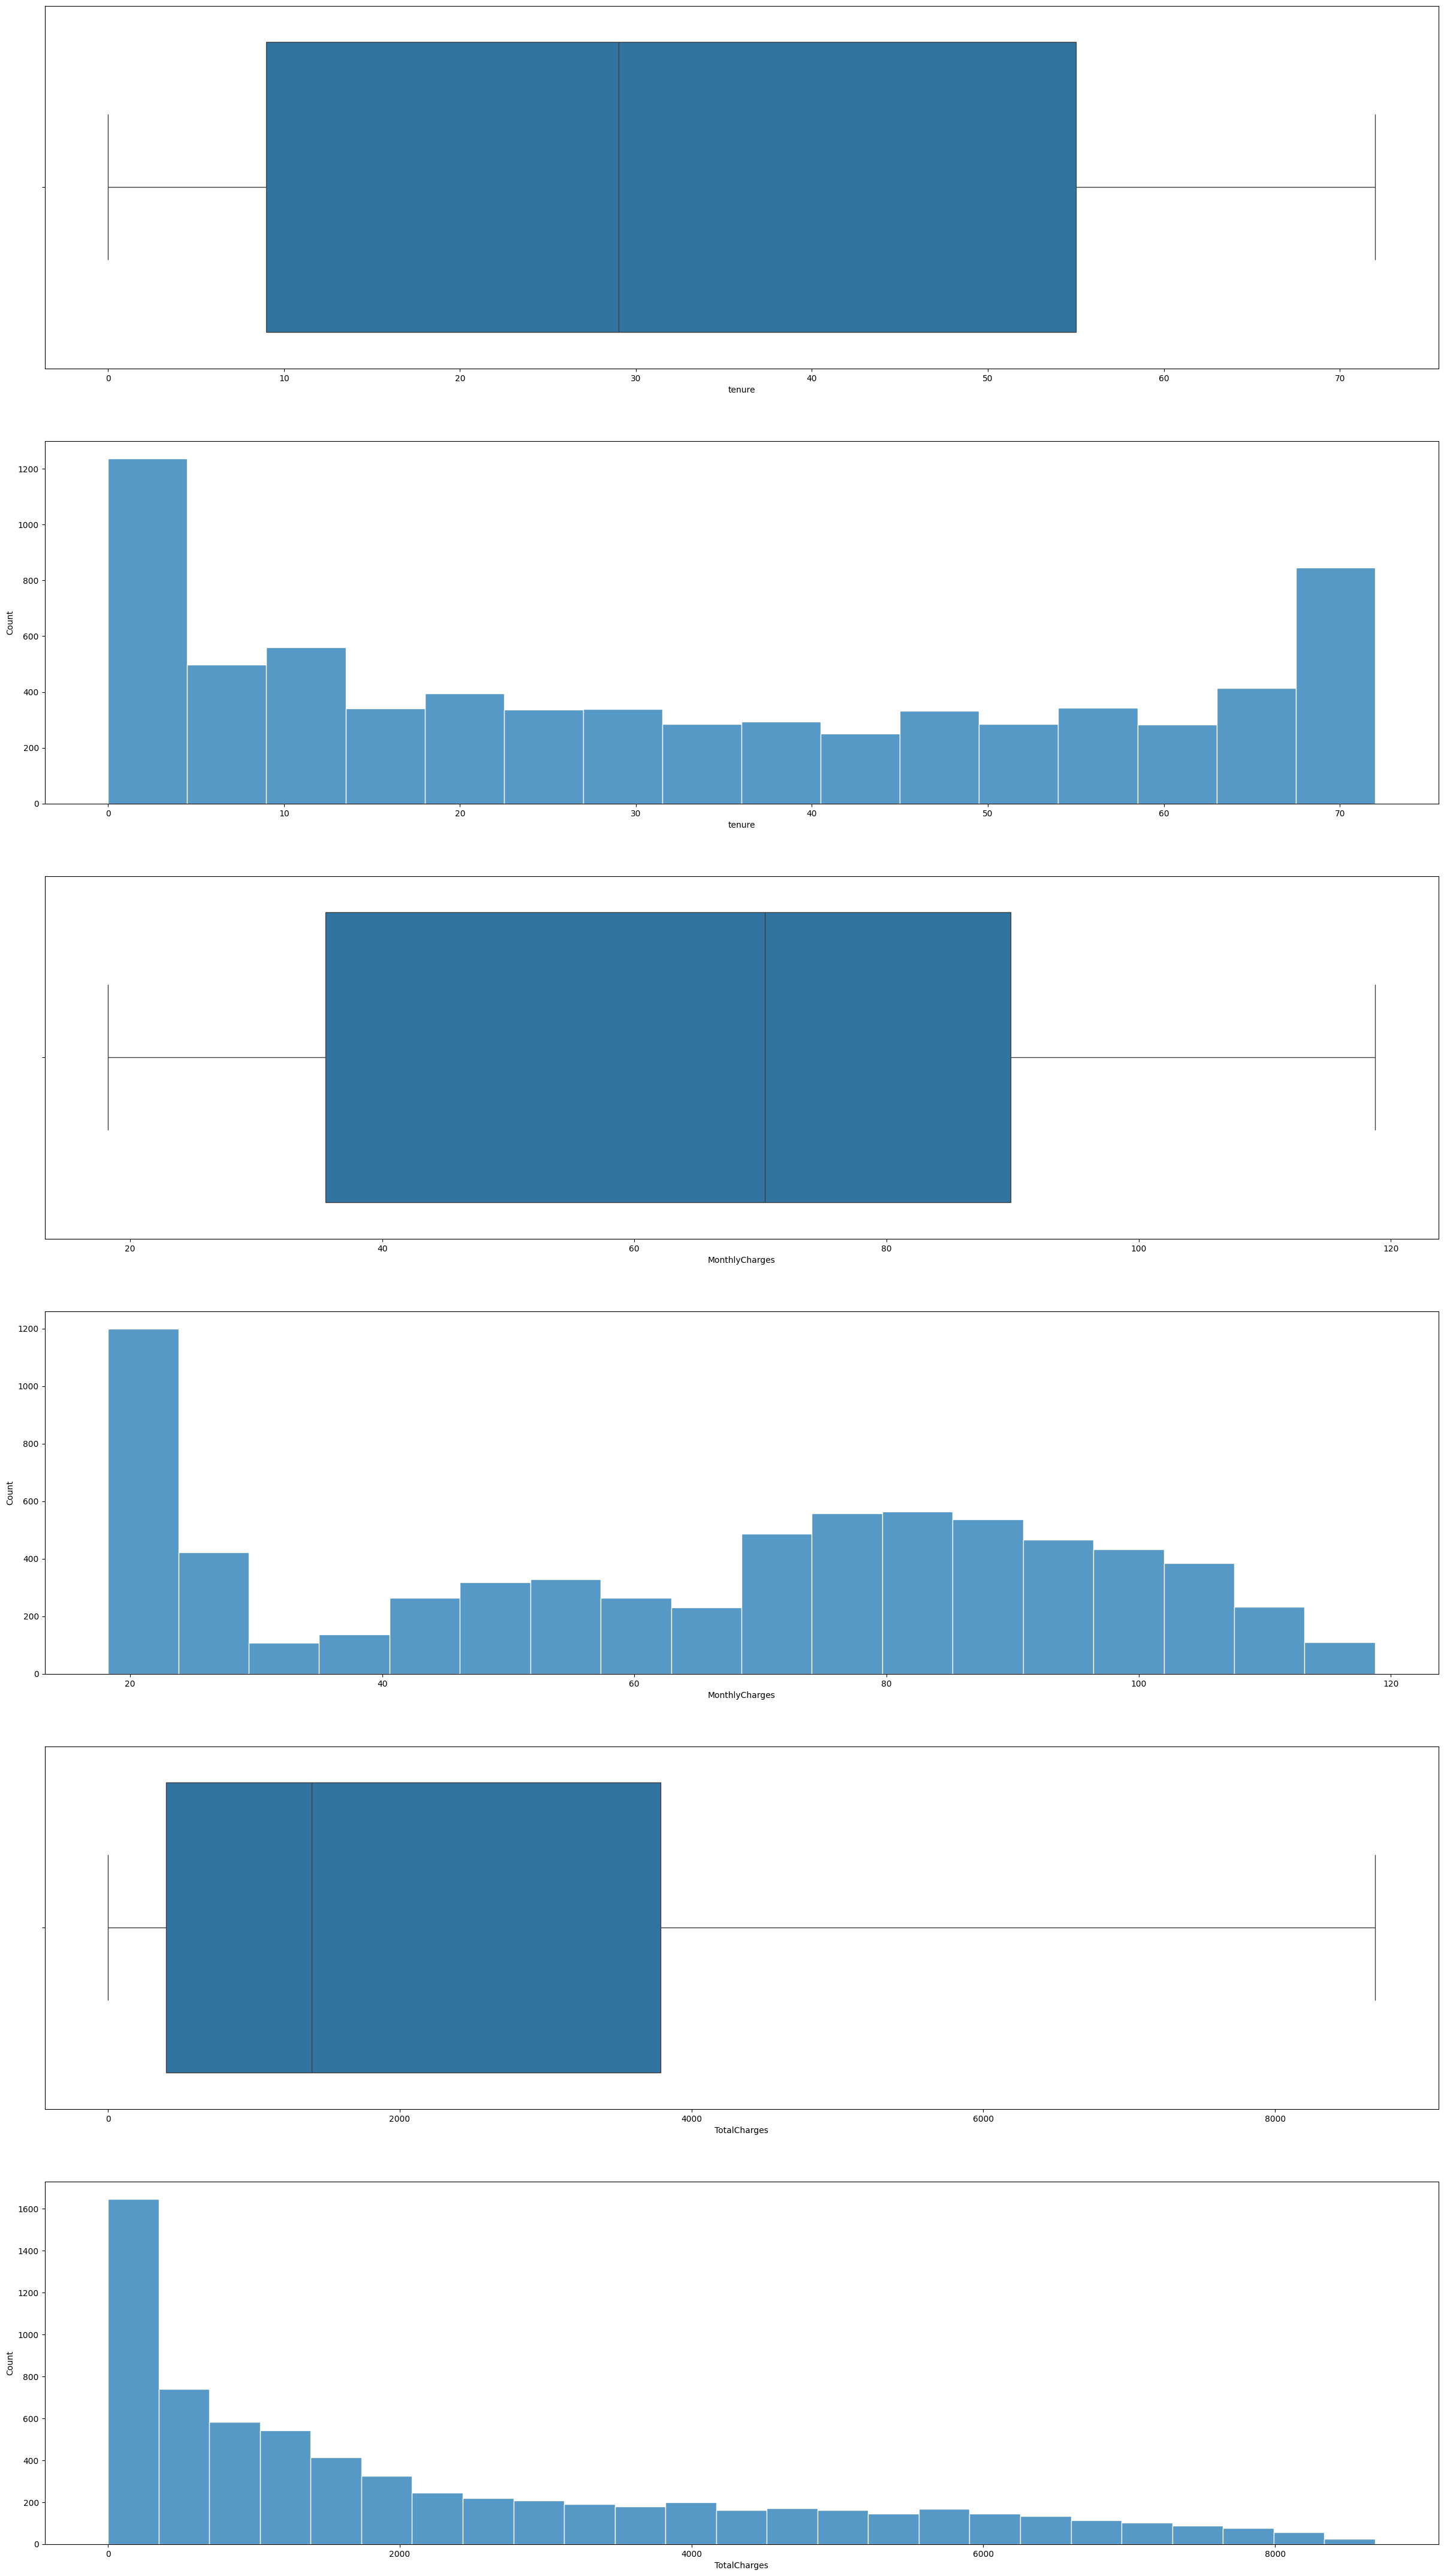

In [26]:
fig, ax = plt.subplots(6, figsize=(30, 55))
sns.set(font_scale=2)

g=sns.boxplot(data=df, x="tenure", ax=ax[0])
g=sns.histplot(data=df, x="tenure", ax=ax[1])


g=sns.boxplot(data=df, x="MonthlyCharges", ax=ax[2])
g=sns.histplot(data=df, x="MonthlyCharges", ax=ax[3])


g=sns.boxplot(data=df, x="TotalCharges", ax=ax[4])
g=sns.histplot(data=df, x="TotalCharges", ax=ax[5])



*   We observe that a large number of our clients remain with us for fewer than ten months. There is a little increase in clients who are willing to stick around for up to 72 months, though.



*   The monthly fees are skewed to the right; many consumers have fees between 20 and 25 Dollars, while fewer have fees over 25 Dollars. This indicates that a large percentage of customers have fees between 20 and 25 Dollars per month.

*   TotalCharges displays the identical pattern. The vast majority of TotalCharges fall between zero and two thousand dollars, with a smaller percentage of monthly costs above that amount.

*   In the end, the distribution of all the numerical features is right skewed.










**Other Numerical Features**

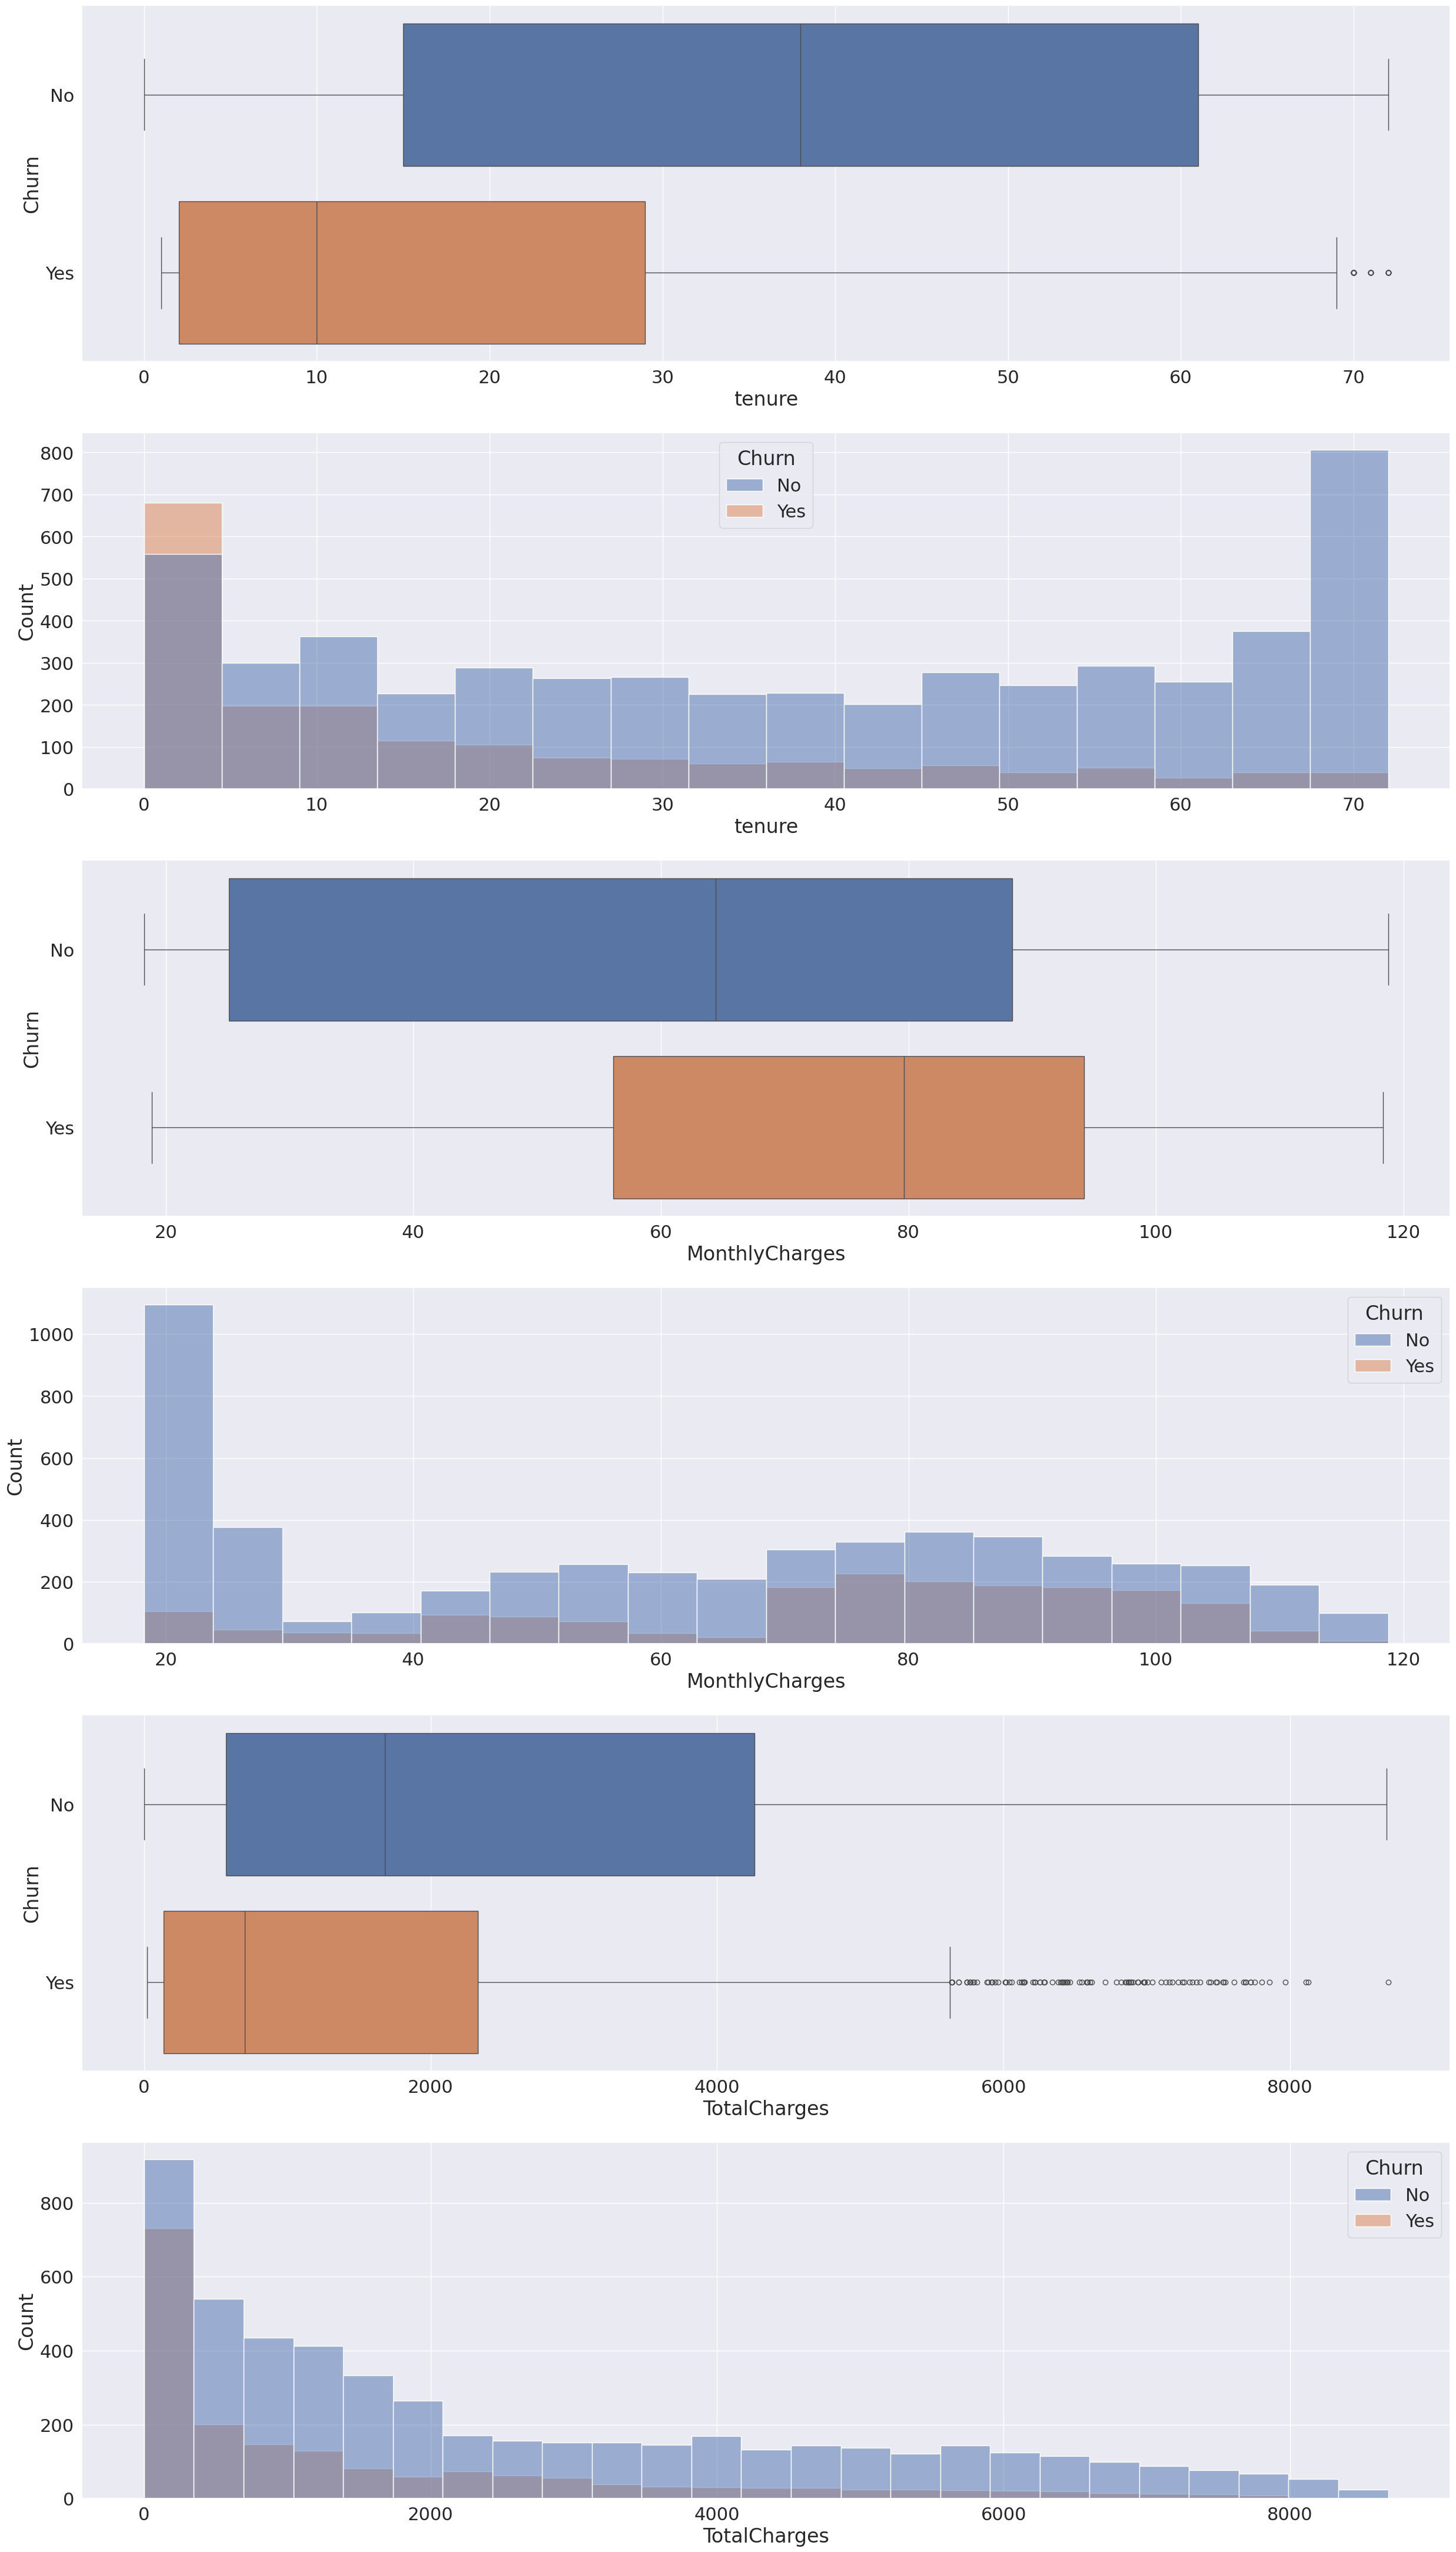

In [27]:
fig, ax = plt.subplots(6, figsize=(30, 55))
sns.set(font_scale=2)

g=sns.boxplot(data=df, x="tenure", y="Churn", ax=ax[0], hue="Churn")
g=sns.histplot(data=df, x="tenure", ax=ax[1], hue="Churn")


g=sns.boxplot(data=df, x="MonthlyCharges", y="Churn", ax=ax[2], hue="Churn")
g=sns.histplot(data=df, x="MonthlyCharges", ax=ax[3], hue="Churn")


g=sns.boxplot(data=df, x="TotalCharges", y="Churn", ax=ax[4], hue="Churn")
g=sns.histplot(data=df, x="TotalCharges", ax=ax[5], hue="Churn")



*   Let's attempt to read the aforementioned charts, which are numerical feature visualizations of churning clients.


*   The Churn shows a similar trend for both numerical variables, tenure and total charges: compared to the remainder of their respective populations, a large number of consumers leave extremely early and with modest total costs, respectively.



*   
When monthly charges exceed eighty dollars, clients that experience churn will abandon the company. This is not the case with monthly charges.



**Categorical Variables**

In [28]:
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

fig, ax = plt.subplots(len(categorical_variables), figsize=(30, 450))

for elem, i in zip(categorical_variables, range(len(categorical_variables))):

    df[elem].value_counts().plot(kind='bar', ax=ax[i], title=elem)

**Notes drawn from the classification barplots**



*   Gender: It appears that we have an equal number of men and women, and both genders exhibit an equivalent volume of lost business.


*   Compared to senior consumers, we have younger ones.


*   Clients who have partners or not are similar.


*   It appears that we have more clients without dependant relatives than we do with.


*   Additionally, there are far more consumers without phone service than there are with it.


*   Customers with internet access typically favor fiber optic or DSL.


*   The features MultipleLines, InternetService, OnlineSecurity, OnlineBackup, and TechSupport share a same pattern. It is demonstrated that a majority of customers would rather not have access to these capabilities than have them.



*   Similar barplots for the features of streaming movies and streaming television indicate that an equal number of users prefer these services or do not.

*   Customers typically choose month-to-month contracts over other options like two- or one-year commitments.

*   Lastly, it appears that the majority of customers use all the various kinds of banking transactions, with electronic checks constituting the majority, and they would prefer paperless billing over any other format.




**Other Categorical Features**

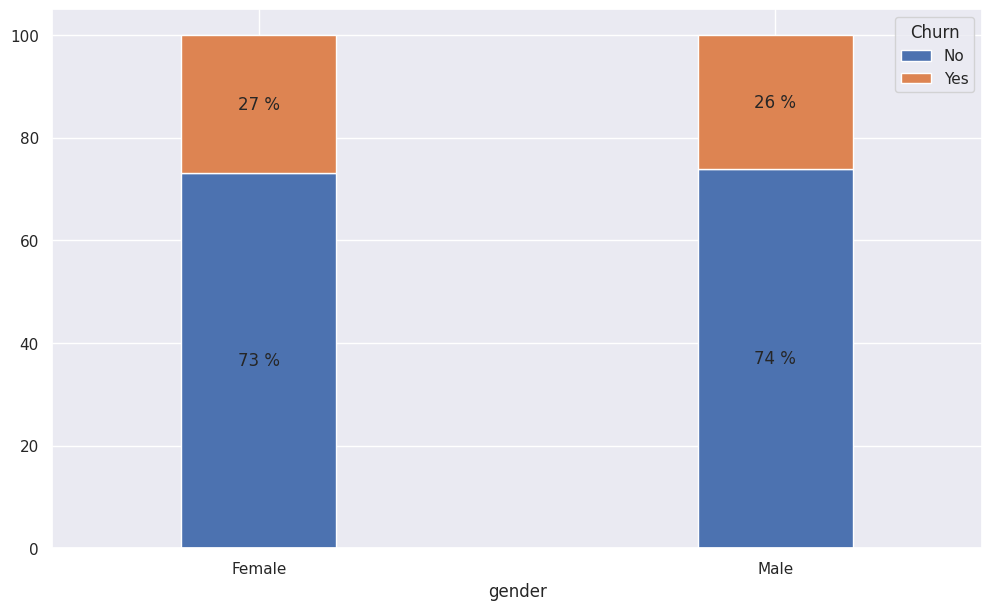

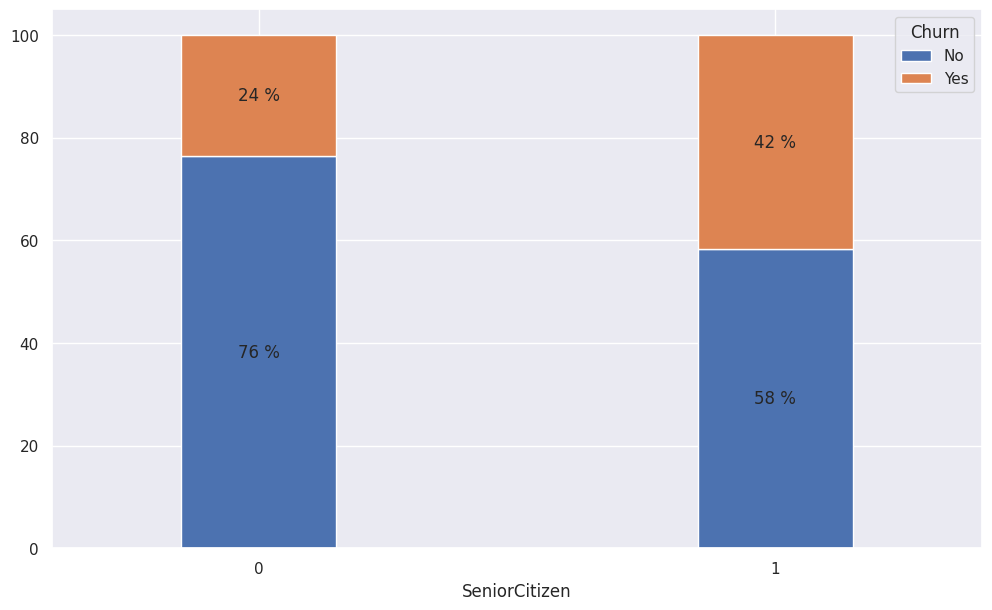

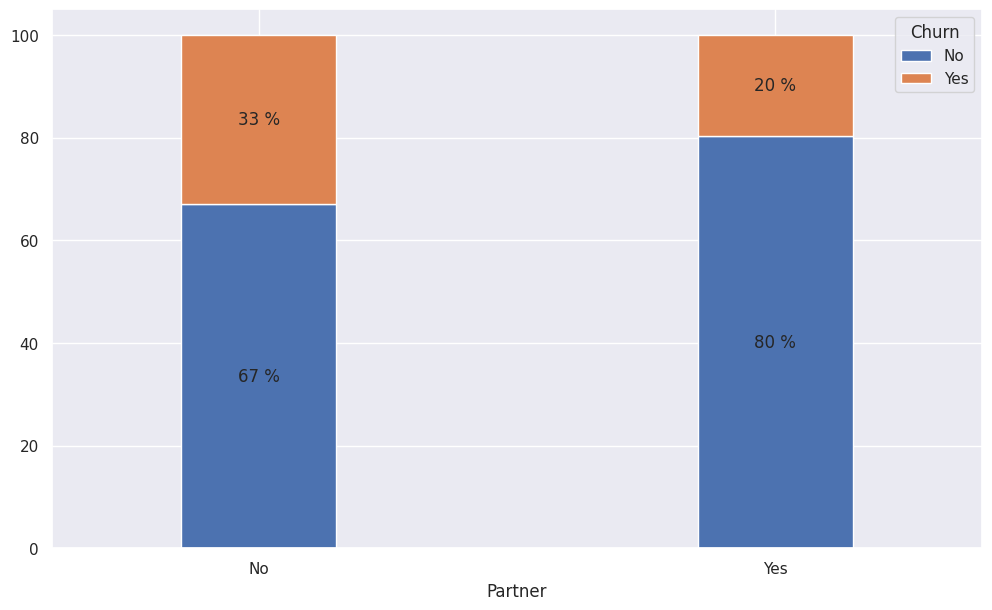

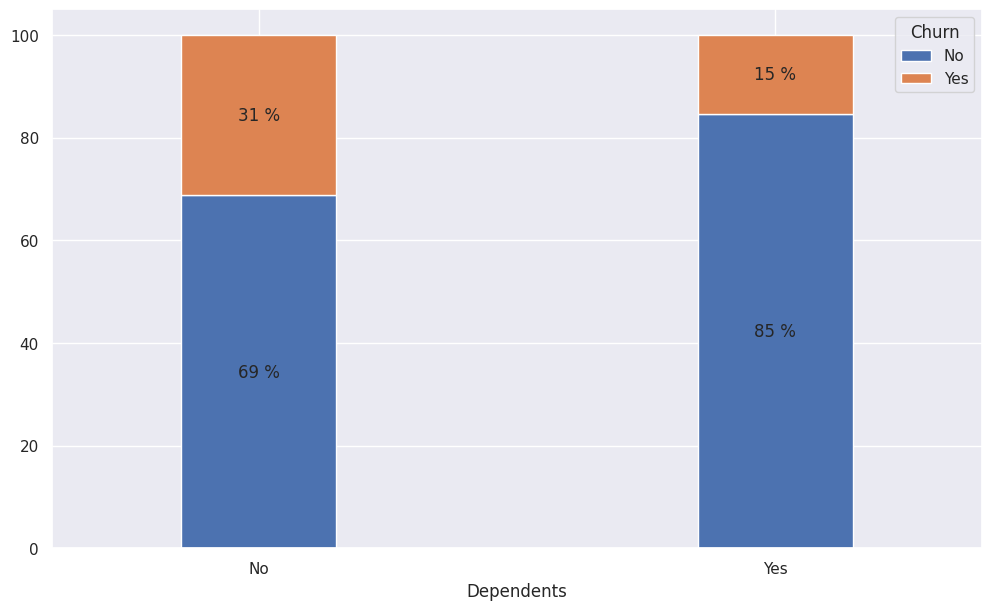

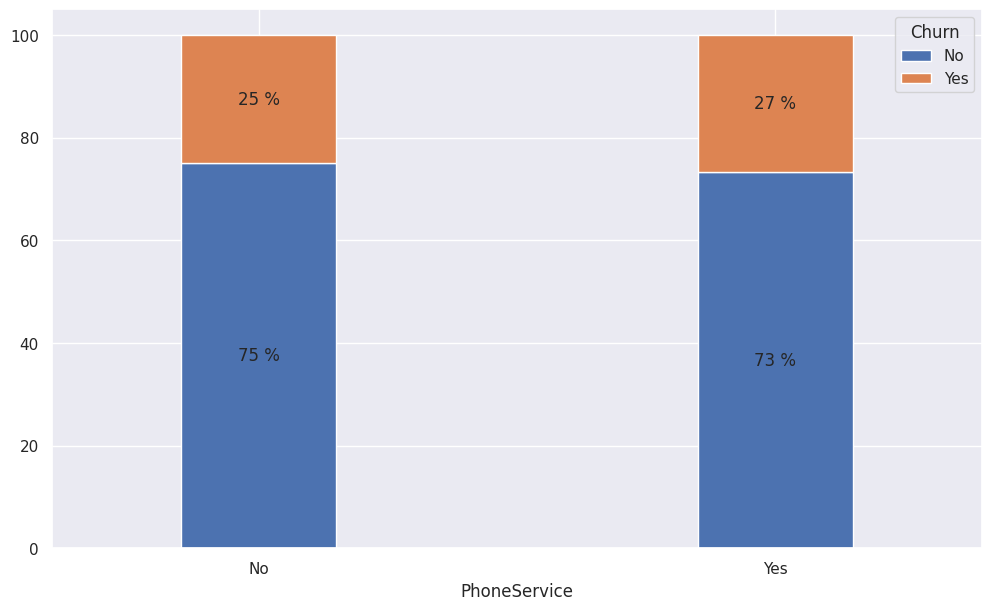

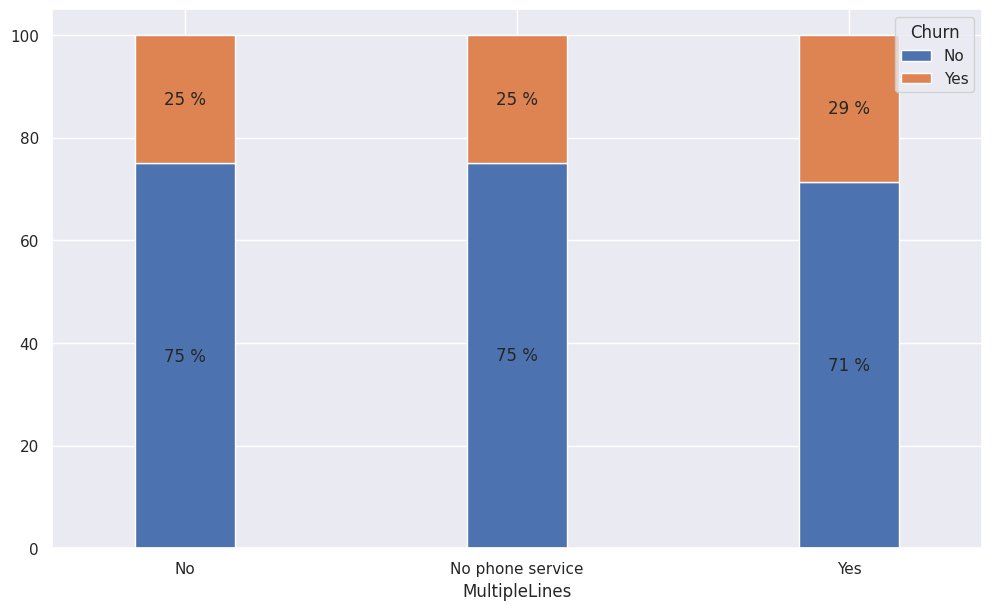

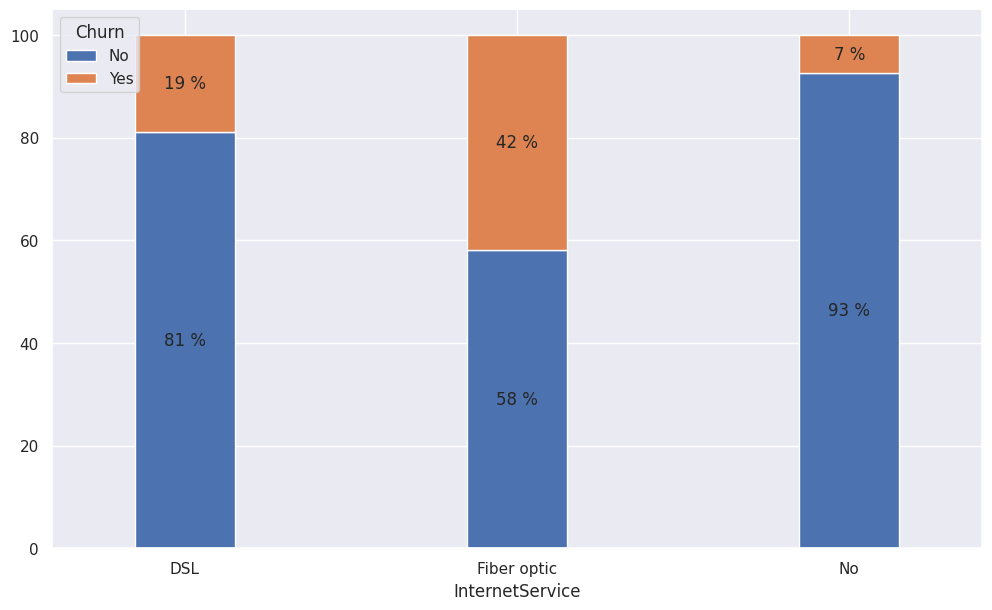

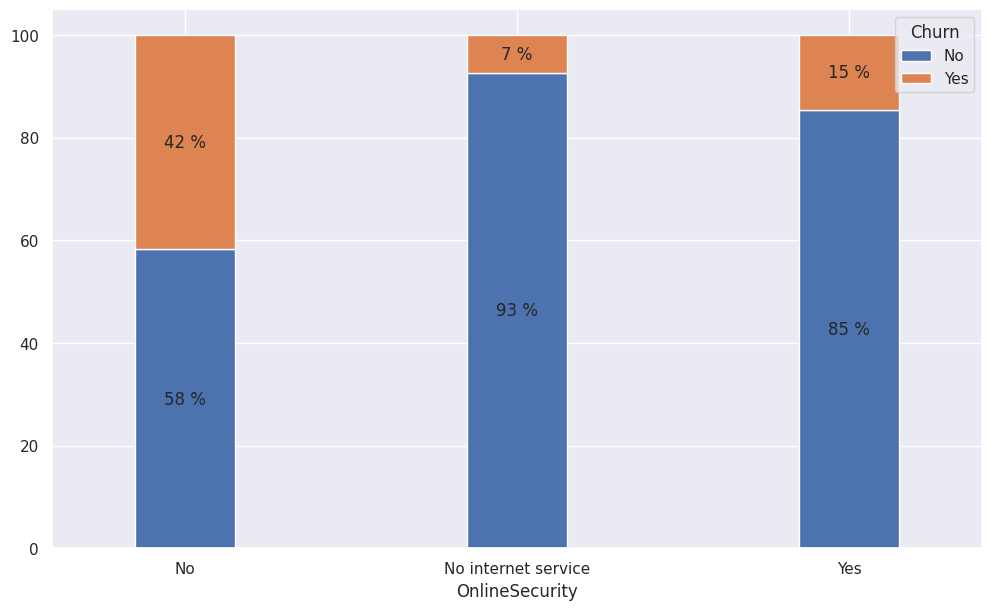

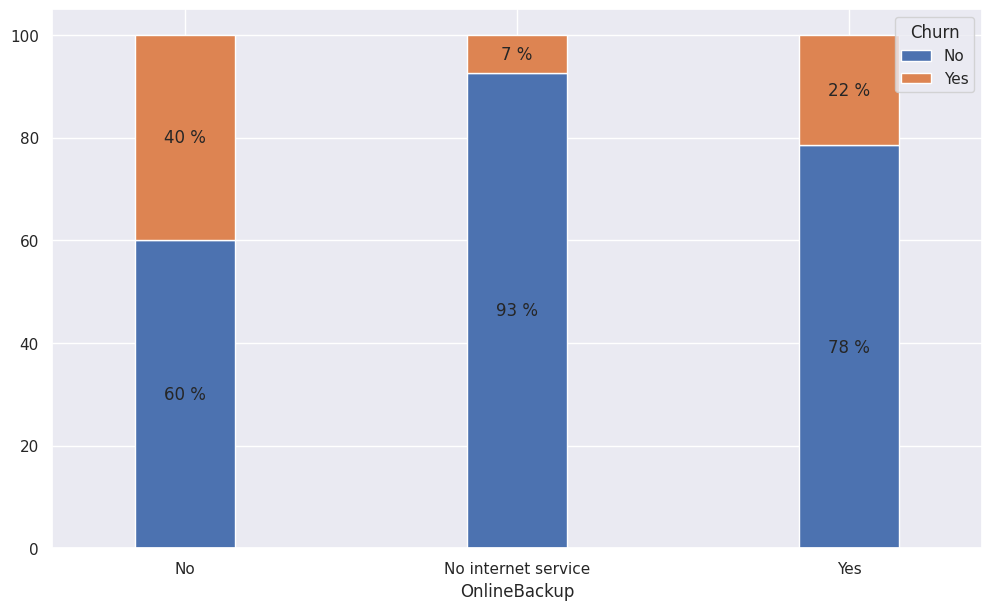

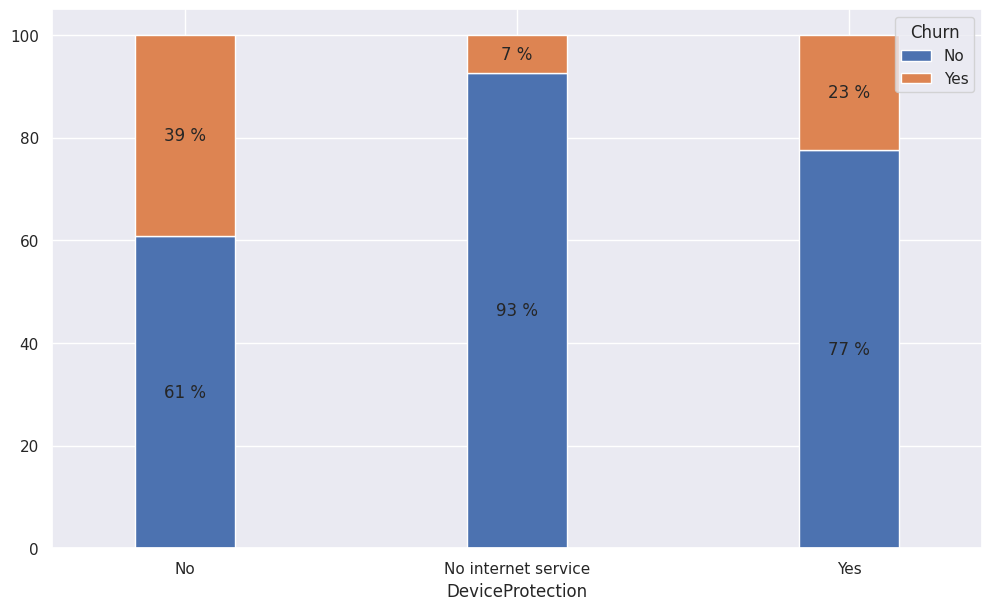

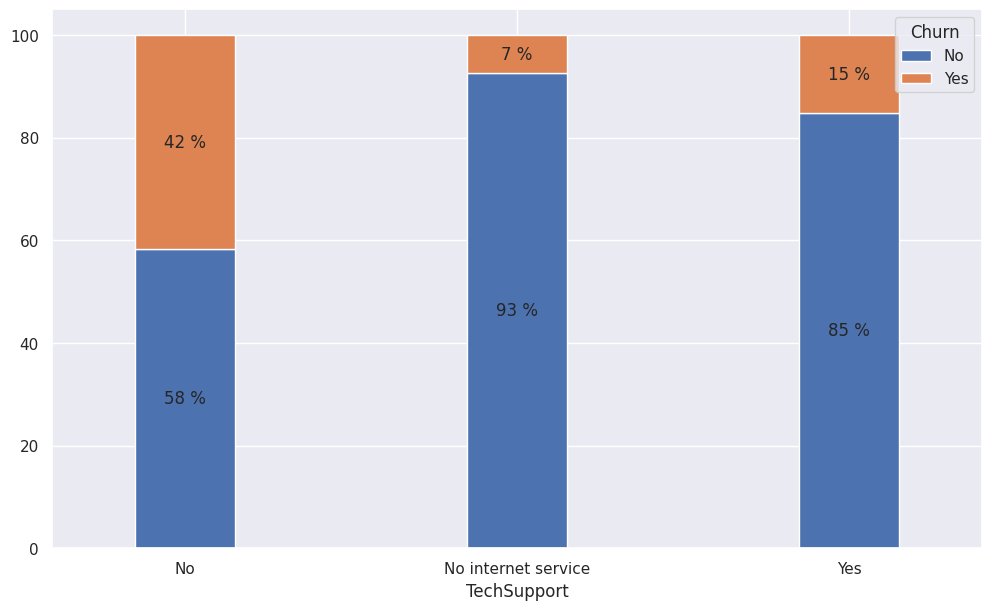

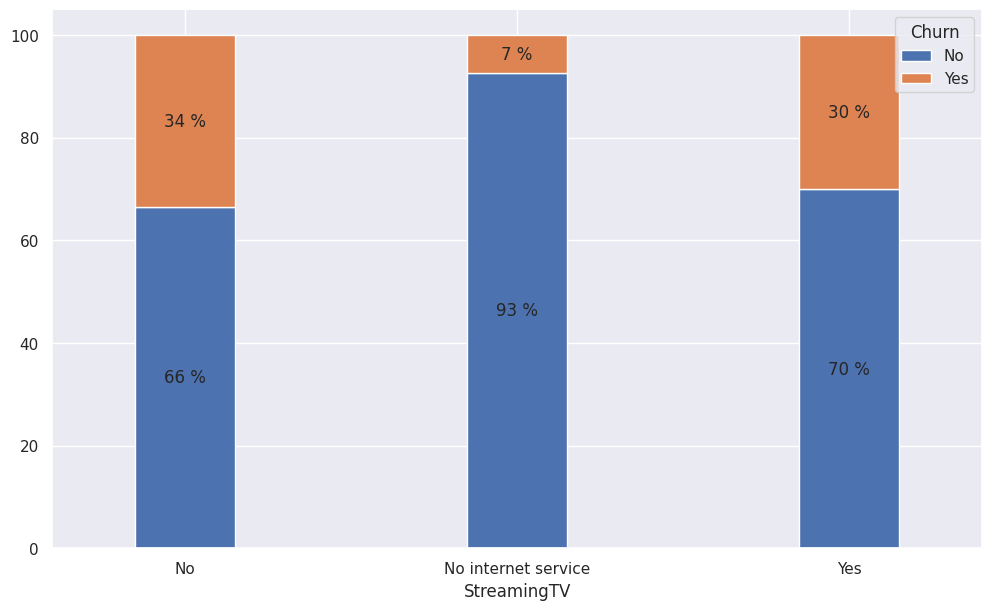

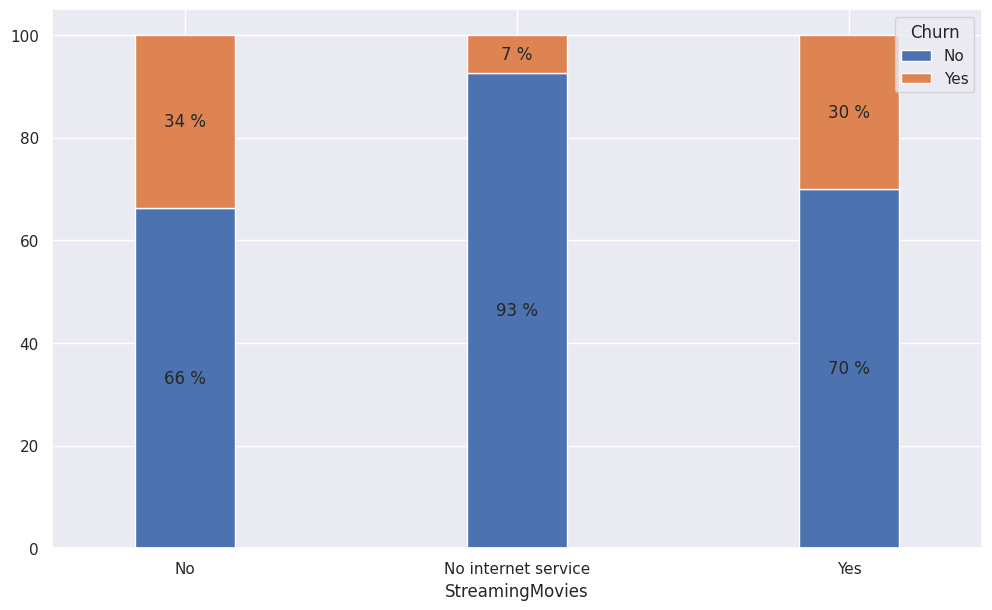

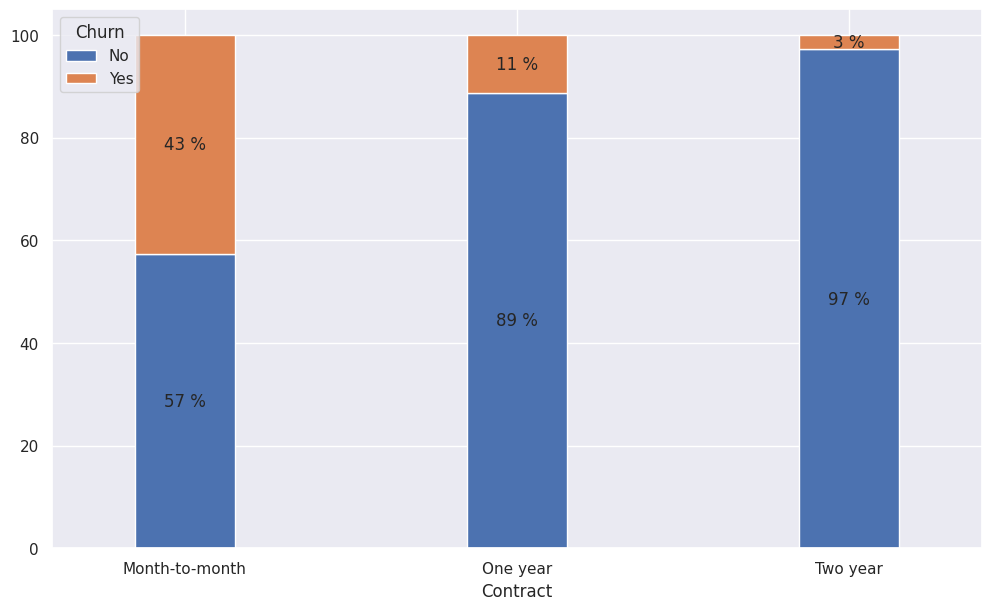

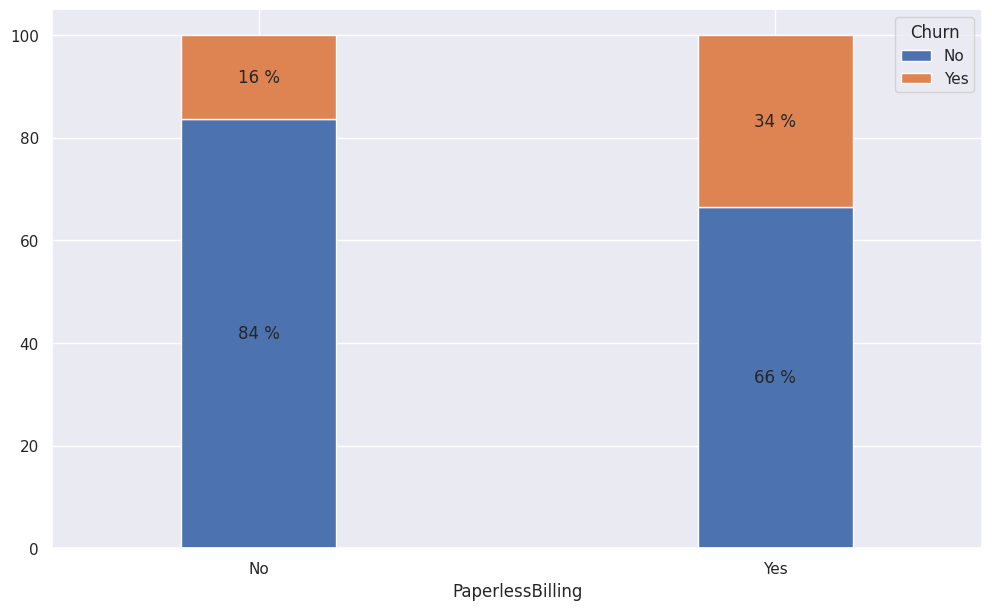

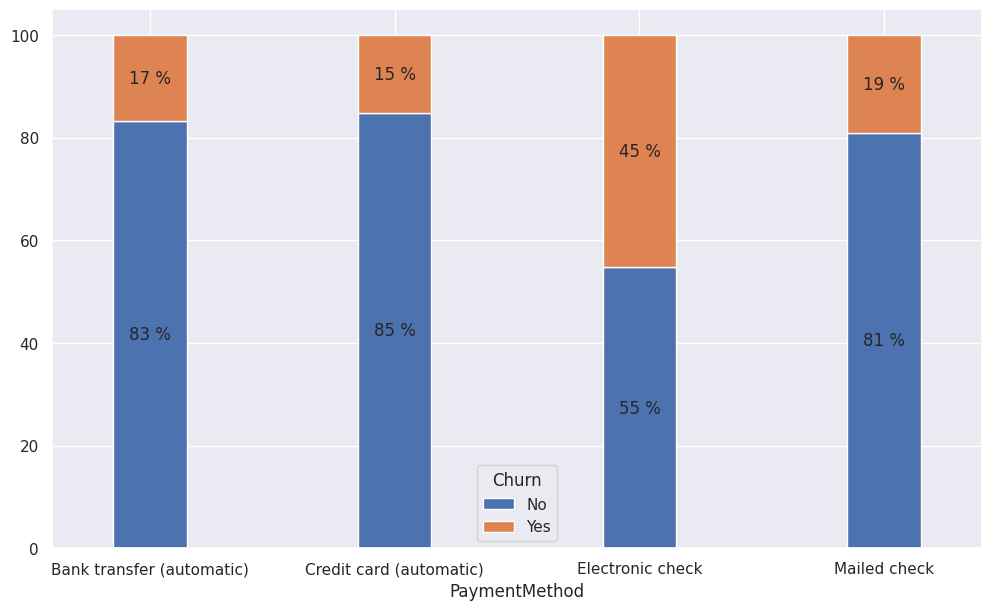

In [29]:
sns.set(font_scale=1)

for i in range(len(categorical_variables)):

    counts = df.groupby([categorical_variables[i],'Churn']).size().unstack()


    ax = (counts.T*100.0 / counts.T.sum()).T.plot(
        kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7))

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x+width/2,
                y+height/2,
                '{:.0f} %'.format(height),
                horizontalalignment='center',
                verticalalignment='center')

**Observation**


*   Gender: The proportion of Churn clients is almost equal for male and female consumers.


*   Compared to non-senior consumers, senior customers are more likely to depart the company.


*   Compared to those who don't, customers without partners are more likely to quit the business.


*   Clients that quit the business don't have any dependents. However, people who do not show up tend to leave the organization less frequently.


*   Customers in the PhoneService and MultipleLines categories exhibit the same percentage of departing from the business.


*   It is imperative to emphasize that, in comparison to other internet service options, fiber optic clients have the greatest attrition rates from the organization.



*  Clients without OnlineSecurity, OnlineBackup, OnlineProtection, or TechSupport will be more likely to experience Churn than the other groups in each category.


*  Additionally, the characteristics The churn rate is the same on StreamingTV and StreamingMovies.


*  Customers with a higher churn probability than those without will be those who choose paperless billing.


*  Finally, it should be mentioned that employees who utilize ElectronicChecks for internal transactions will be much less likely to leave the organization than those who do not.


**FINAL EDA**

<ipython-input-30-25e923c62267>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Churn", data=df, palette="rocket")


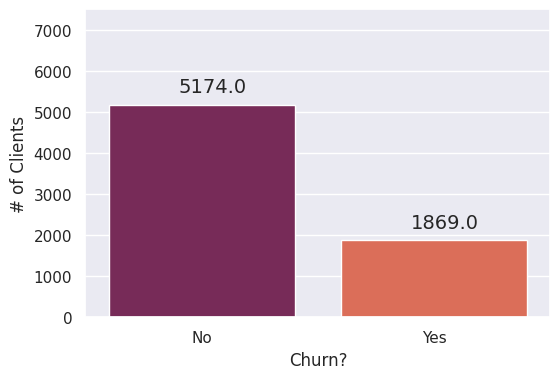

In [30]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="Churn", data=df, palette="rocket")

plt.xlabel("Churn?", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,7500)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 14)

plt.show()

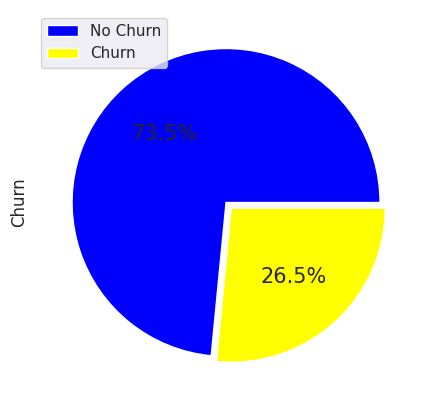

In [32]:
plt.figure(figsize=(7,5))

df['Churn'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['BLUE','YELLOW'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Churn', 'Churn'])
plt.show()

The customer churn rate throughout the period covered by this dataset is 26,5%. As we continue to examine the features, we can contrast this figure with the proportion of churn observed in each category, giving us a clearer understanding of how a particular feature affects the business's capacity to keep consumers.

In [37]:
#Label encoding Churn to use sns.barplot
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
df['Churn'].value_counts()


0    5174
1    1869
Name: Churn, dtype: int64

We can divide the features into the following groups:


*   Demographic features;
*   Service-related features
*   Account information related features (categorical and numerical).

We will first examine the distributions of the traits for each group. The churn % for each category will next be examined in order to see how each category relates to the target.




In [40]:
demo_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

serv_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup'
                , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

cat_accinfo_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

num_accinfo_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

**Demograhic Features**

<ipython-input-41-207d7a3d8962>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = col, palette = 'rocket')
<ipython-input-41-207d7a3d8962>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = col, palette = 'rocket')
<ipython-input-41-207d7a3d8962>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = col, palette = 'rocket')
<ipython-input-41-207d7a3d8962>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

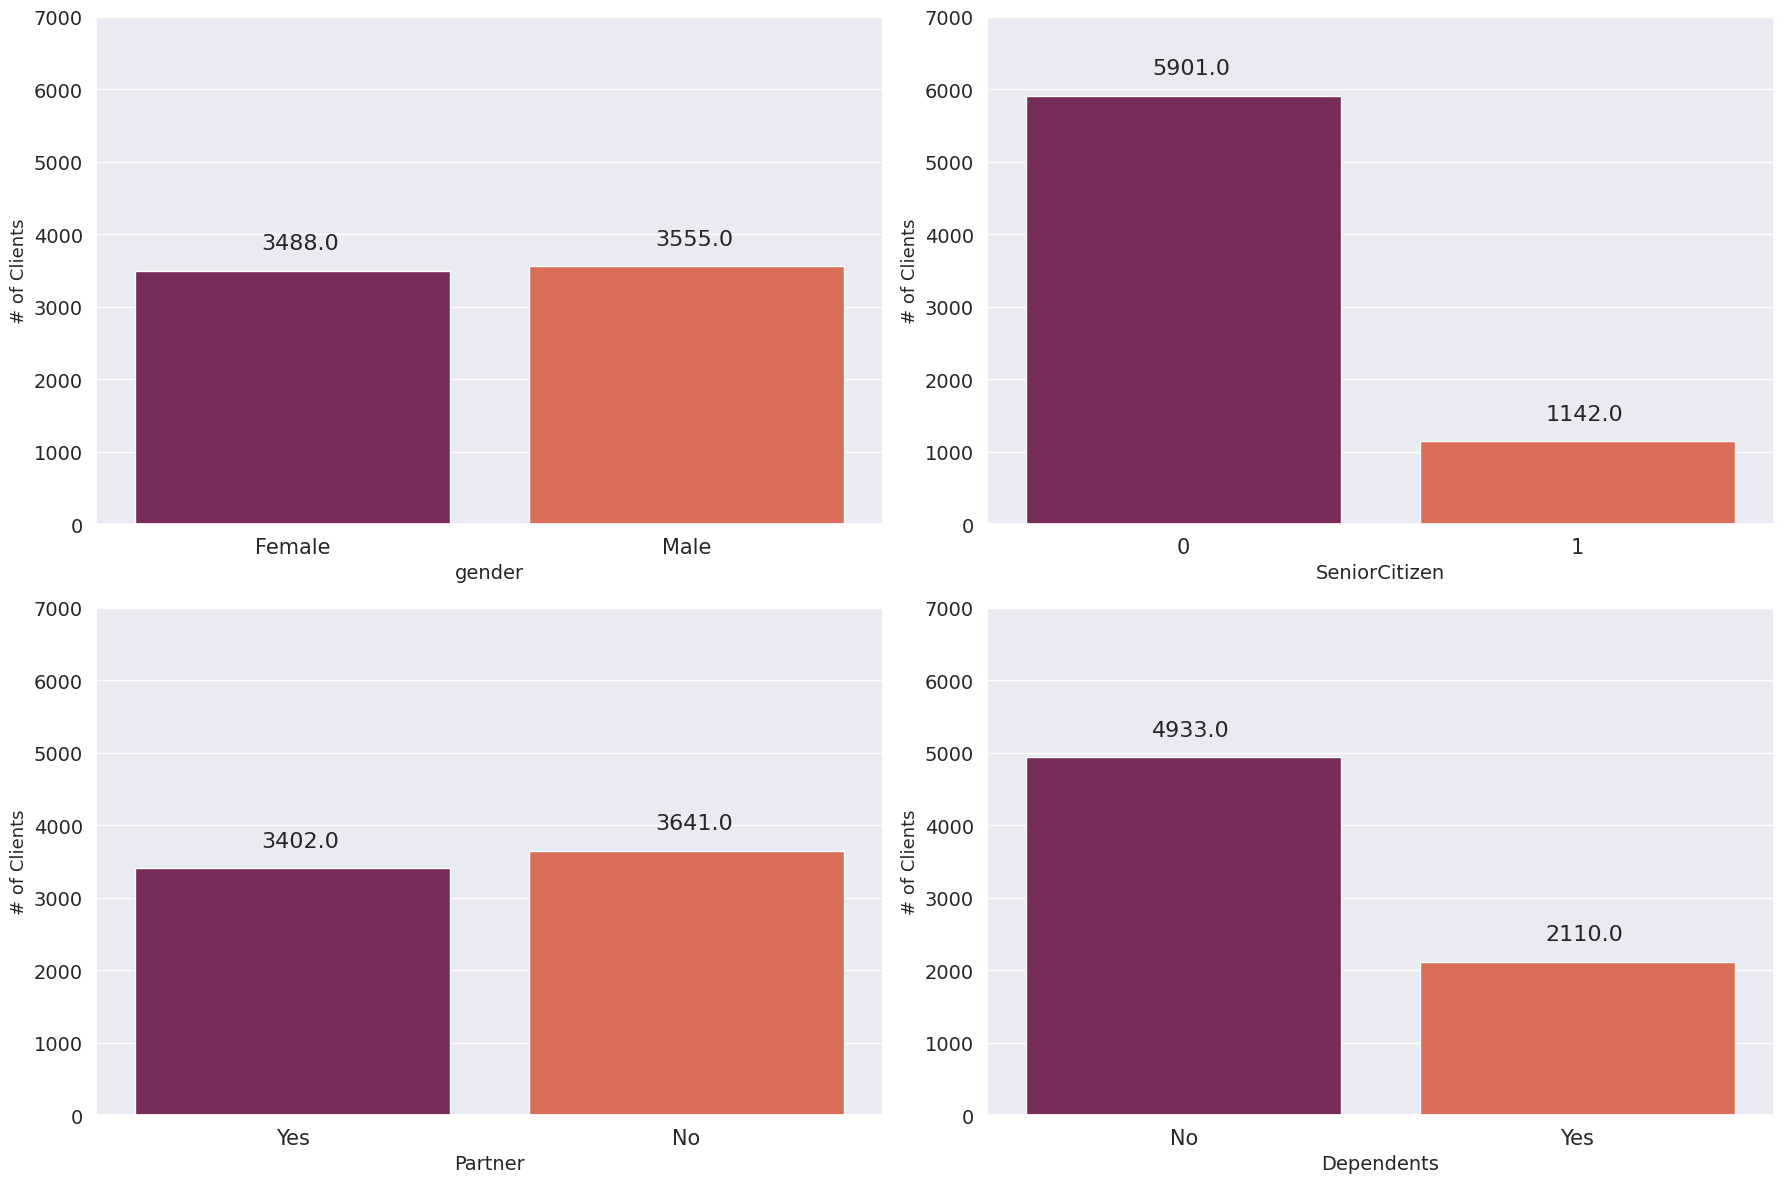

In [41]:
plt.figure(figsize=(18,12))

for i,col in enumerate(demo_features):
    plt.subplot(2,2,i + 1)

    ax = sns.countplot(data = df, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 16)

plt.tight_layout()

plt.show()

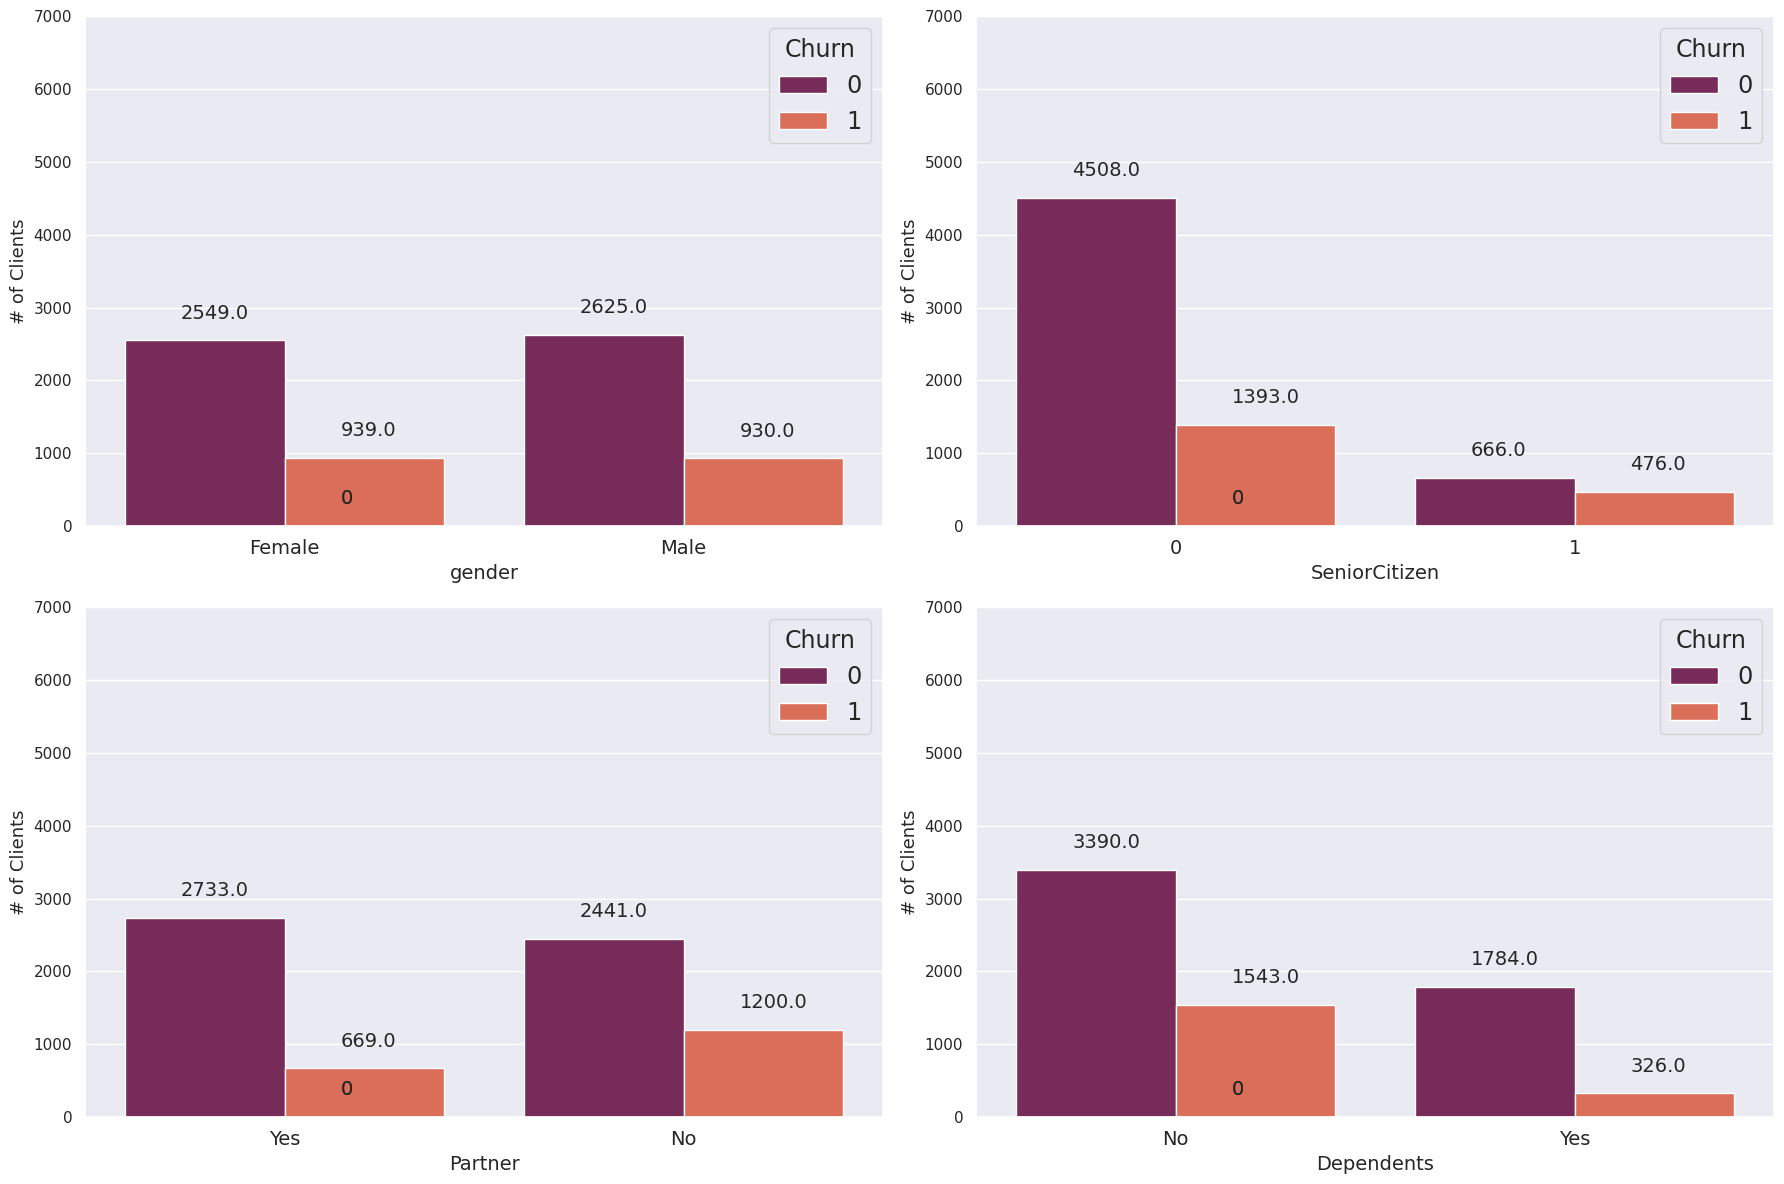

In [42]:
plt.figure(figsize=(18,12))

for i,col in enumerate(demo_features):
    plt.subplot(2,2,i + 1)

    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)

    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

<ipython-input-43-62c30ae5f086>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)
<ipython-input-43-62c30ae5f086>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)
<ipython-input-43-62c30ae5f086>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)
<ipython-input-43-62c30ae5f086>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = "Churn", data = df, palette

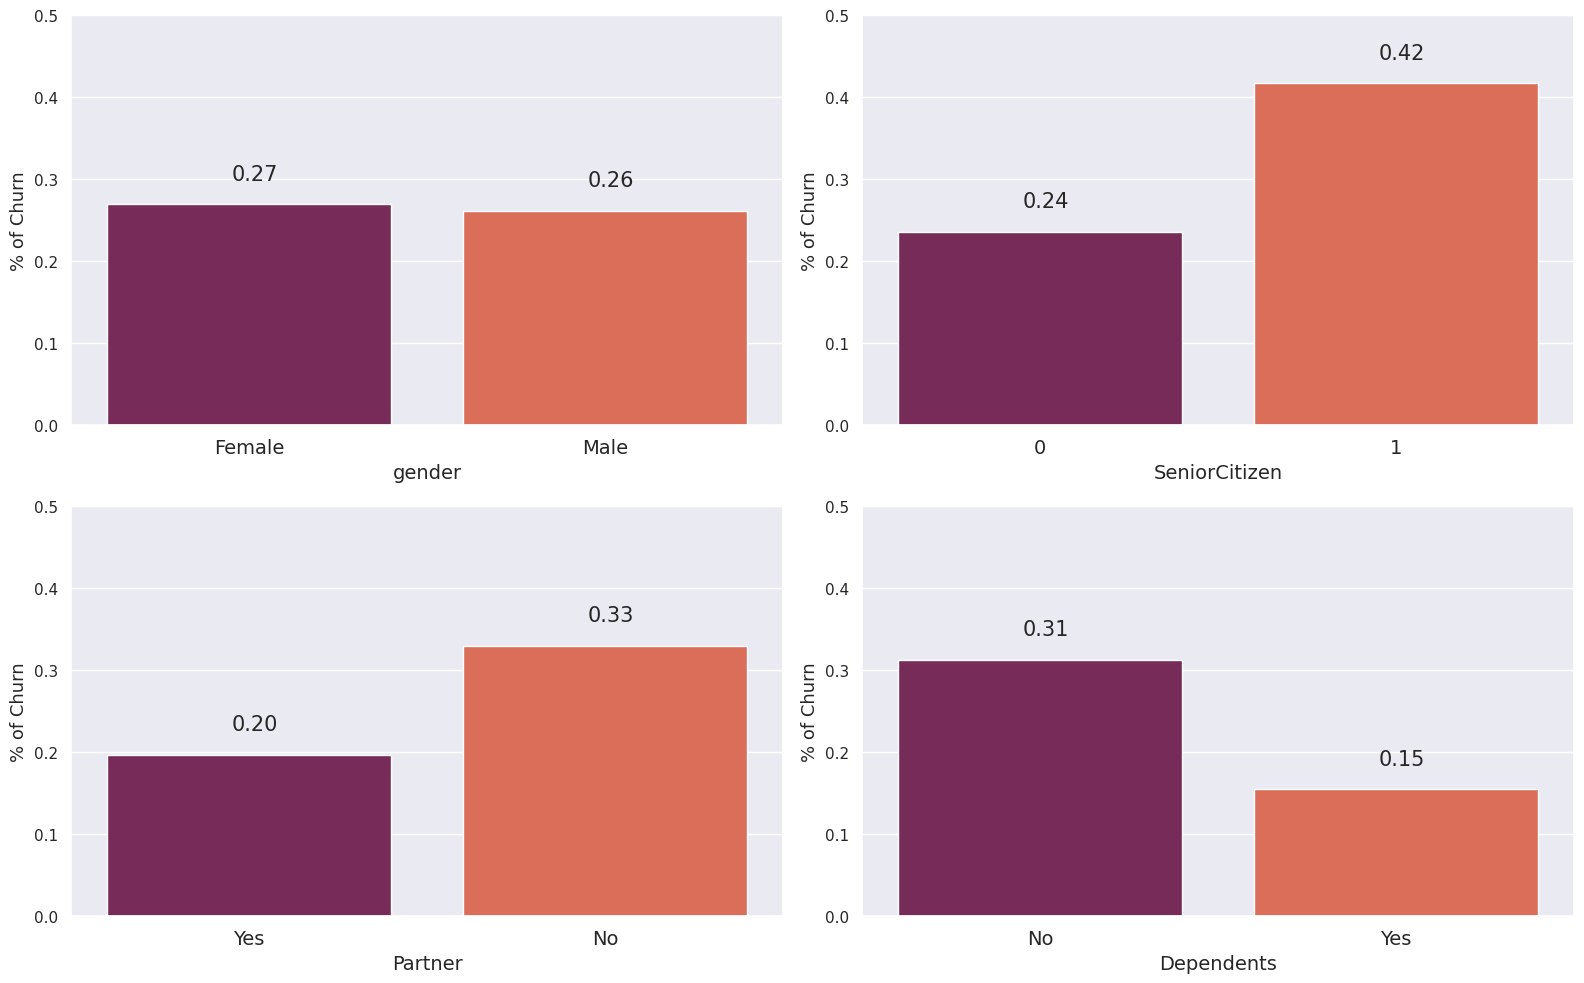

In [43]:
plt.figure(figsize=(16,10))

for i,col in enumerate(demo_features):
    plt.subplot(2,2,i + 1)

    ax = sns.barplot(x = col, y = "Churn", data = df, palette = 'rocket', ci = None)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("% of Churn", fontsize= 13)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=15)

plt.tight_layout()

plt.show()

**Observation**



*   Gender: The churn percentage for men and women hardly differs at all;

*   Senior Citizen: There is a high probability of attrition from this demographic, as evidenced by the churn percentage for senior clients, which is above 40%;

*   Partner: Compared to customers with partners, single customers are more likely to churn;

*   Dependents: Compared to customers without any dependents, those who have dependents have a lower churn rate.


To evaluate if both of the "family-related" features—"Partner" and "Dependents"—actually increase the likelihood of customer turnover or retention, we could even go a step further and combine them.

Since most customers with dependents are married, it stands to reason that a customer's marital status will have less of an impact on the objective than their child status. Even though this might be unlikely, we can rule out this theory more confidently by looking at both attributes jointly.


In [44]:
df.groupby(['Partner'])['Dependents'].value_counts()

Partner  Dependents
No       No            3280
         Yes            361
Yes      Yes           1749
         No            1653
Name: Dependents, dtype: int64

Naturally, the majority of clients who have dependents also have a partner. However, the proportion of single clients with dependents appears substantial enough for us to make some inferences about this specific group.

In [45]:
df.groupby(by=['Partner', 'Dependents'])['Churn'].value_counts(normalize = True)

Partner  Dependents  Churn
No       No          0        0.657622
                     1        0.342378
         Yes         0        0.786704
                     1        0.213296
Yes      No          0        0.745917
                     1        0.254083
         Yes         0        0.857633
                     1        0.142367
Name: Churn, dtype: float64

<ipython-input-46-60365014ea22>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "Dependents", y = "Churn", hue = "Partner", data = df, palette = 'rocket', ci = None)


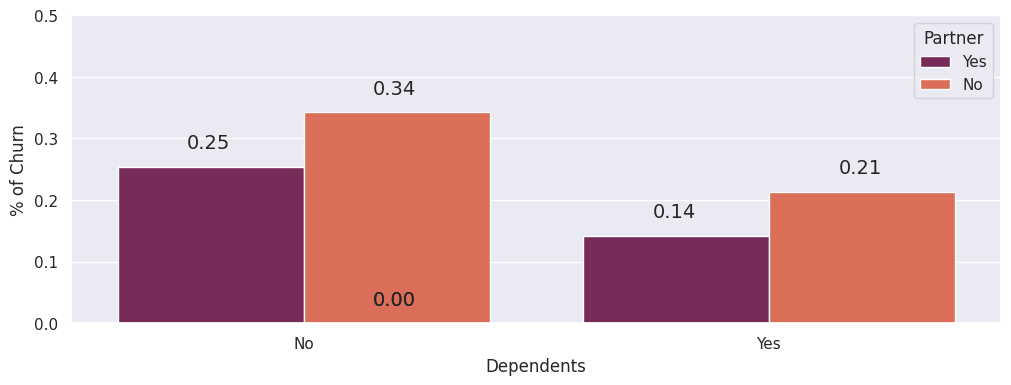

In [46]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "Dependents", y = "Churn", hue = "Partner", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.15, p.get_height()+0.03),fontsize=14)

plt.show()

It is evident that both characteristics increase the chance of churn. In terms of chance of turnover, the groups with partners and dependents and the ones without either are at the extremes (14% and 34%, respectively). Although the "opposite" group still has a lower chance of turnover, the churn percentage of customers with partners and without dependents is similar to the total churn percentage in our sample.

**Service Related Features**

<ipython-input-47-fcc3156f000d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = col, palette = 'rocket')
<ipython-input-47-fcc3156f000d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = col, palette = 'rocket')
<ipython-input-47-fcc3156f000d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = col, palette = 'rocket')
<ipython-input-47-fcc3156f000d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

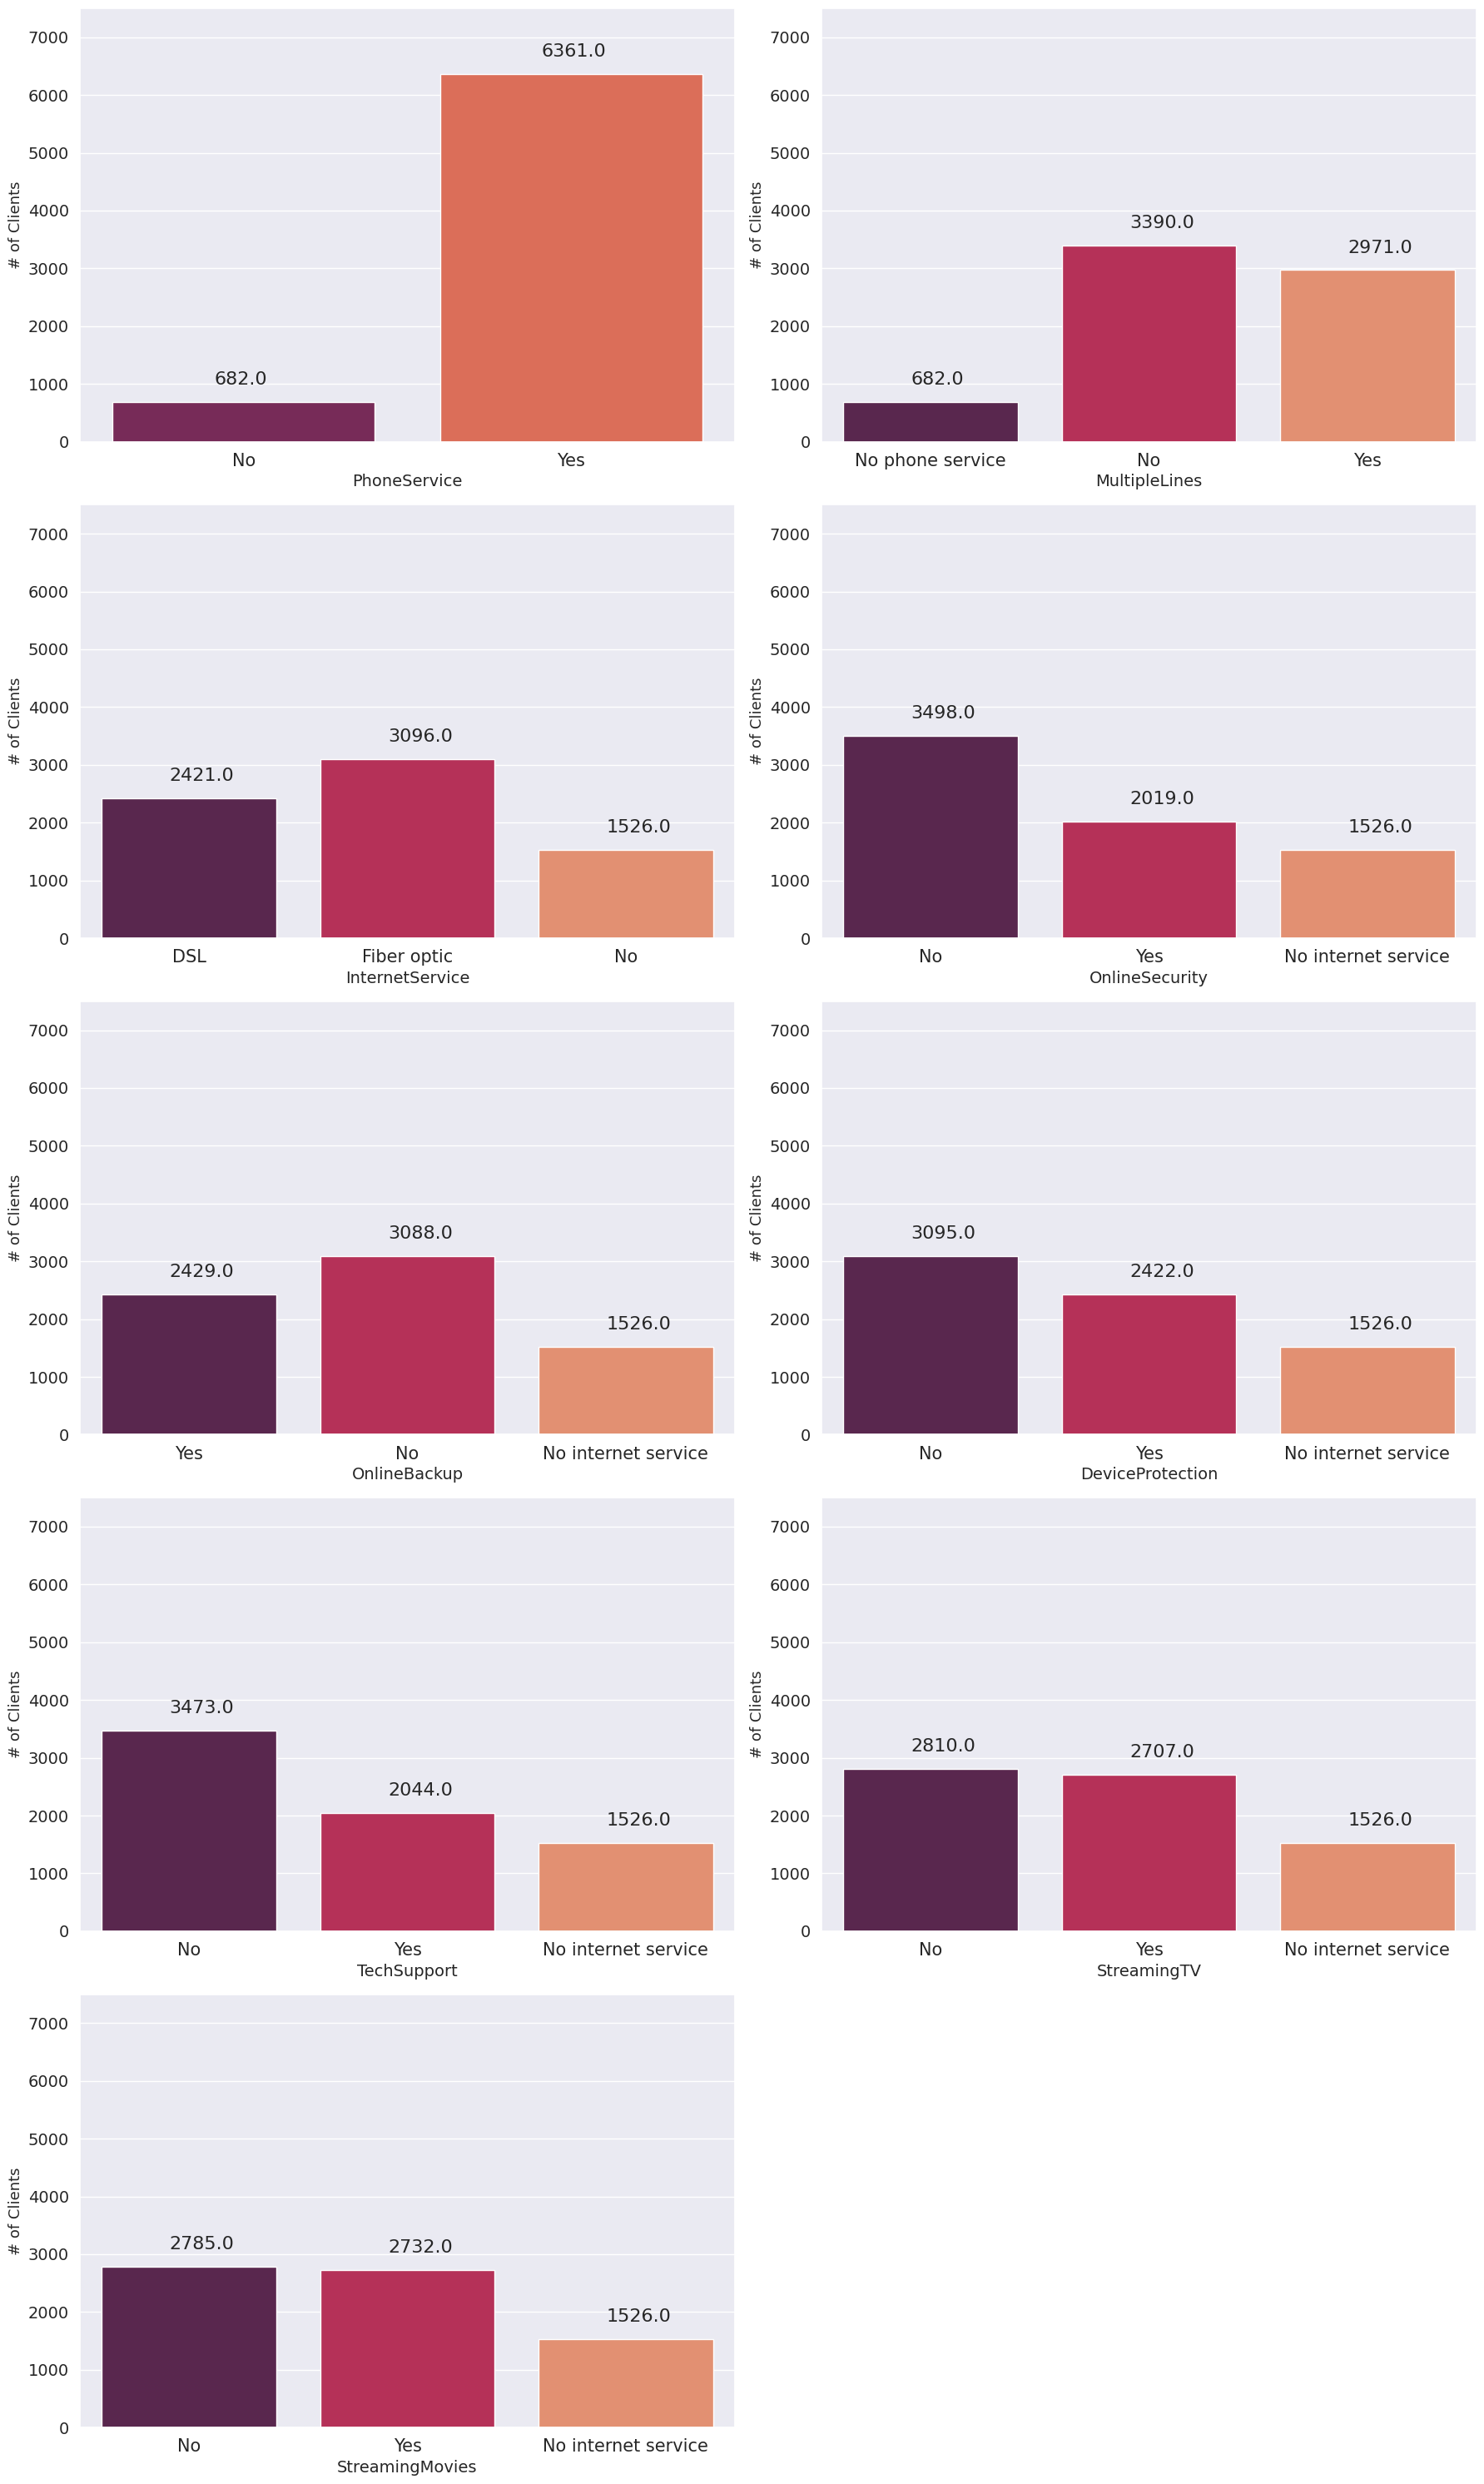

In [47]:
plt.figure(figsize=(18,30))

for i,col in enumerate(serv_features):
    plt.subplot(5,2,i + 1)

    ax = sns.countplot(data = df, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7500)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.31, p.get_height()+300), fontsize= 16)

plt.tight_layout()

plt.show()

There are comparatively few clients who do not have phone service, and even fewer who do not have internet access. Remember that the majority of services are limited to clients that sign up for the Telco's internet connection.

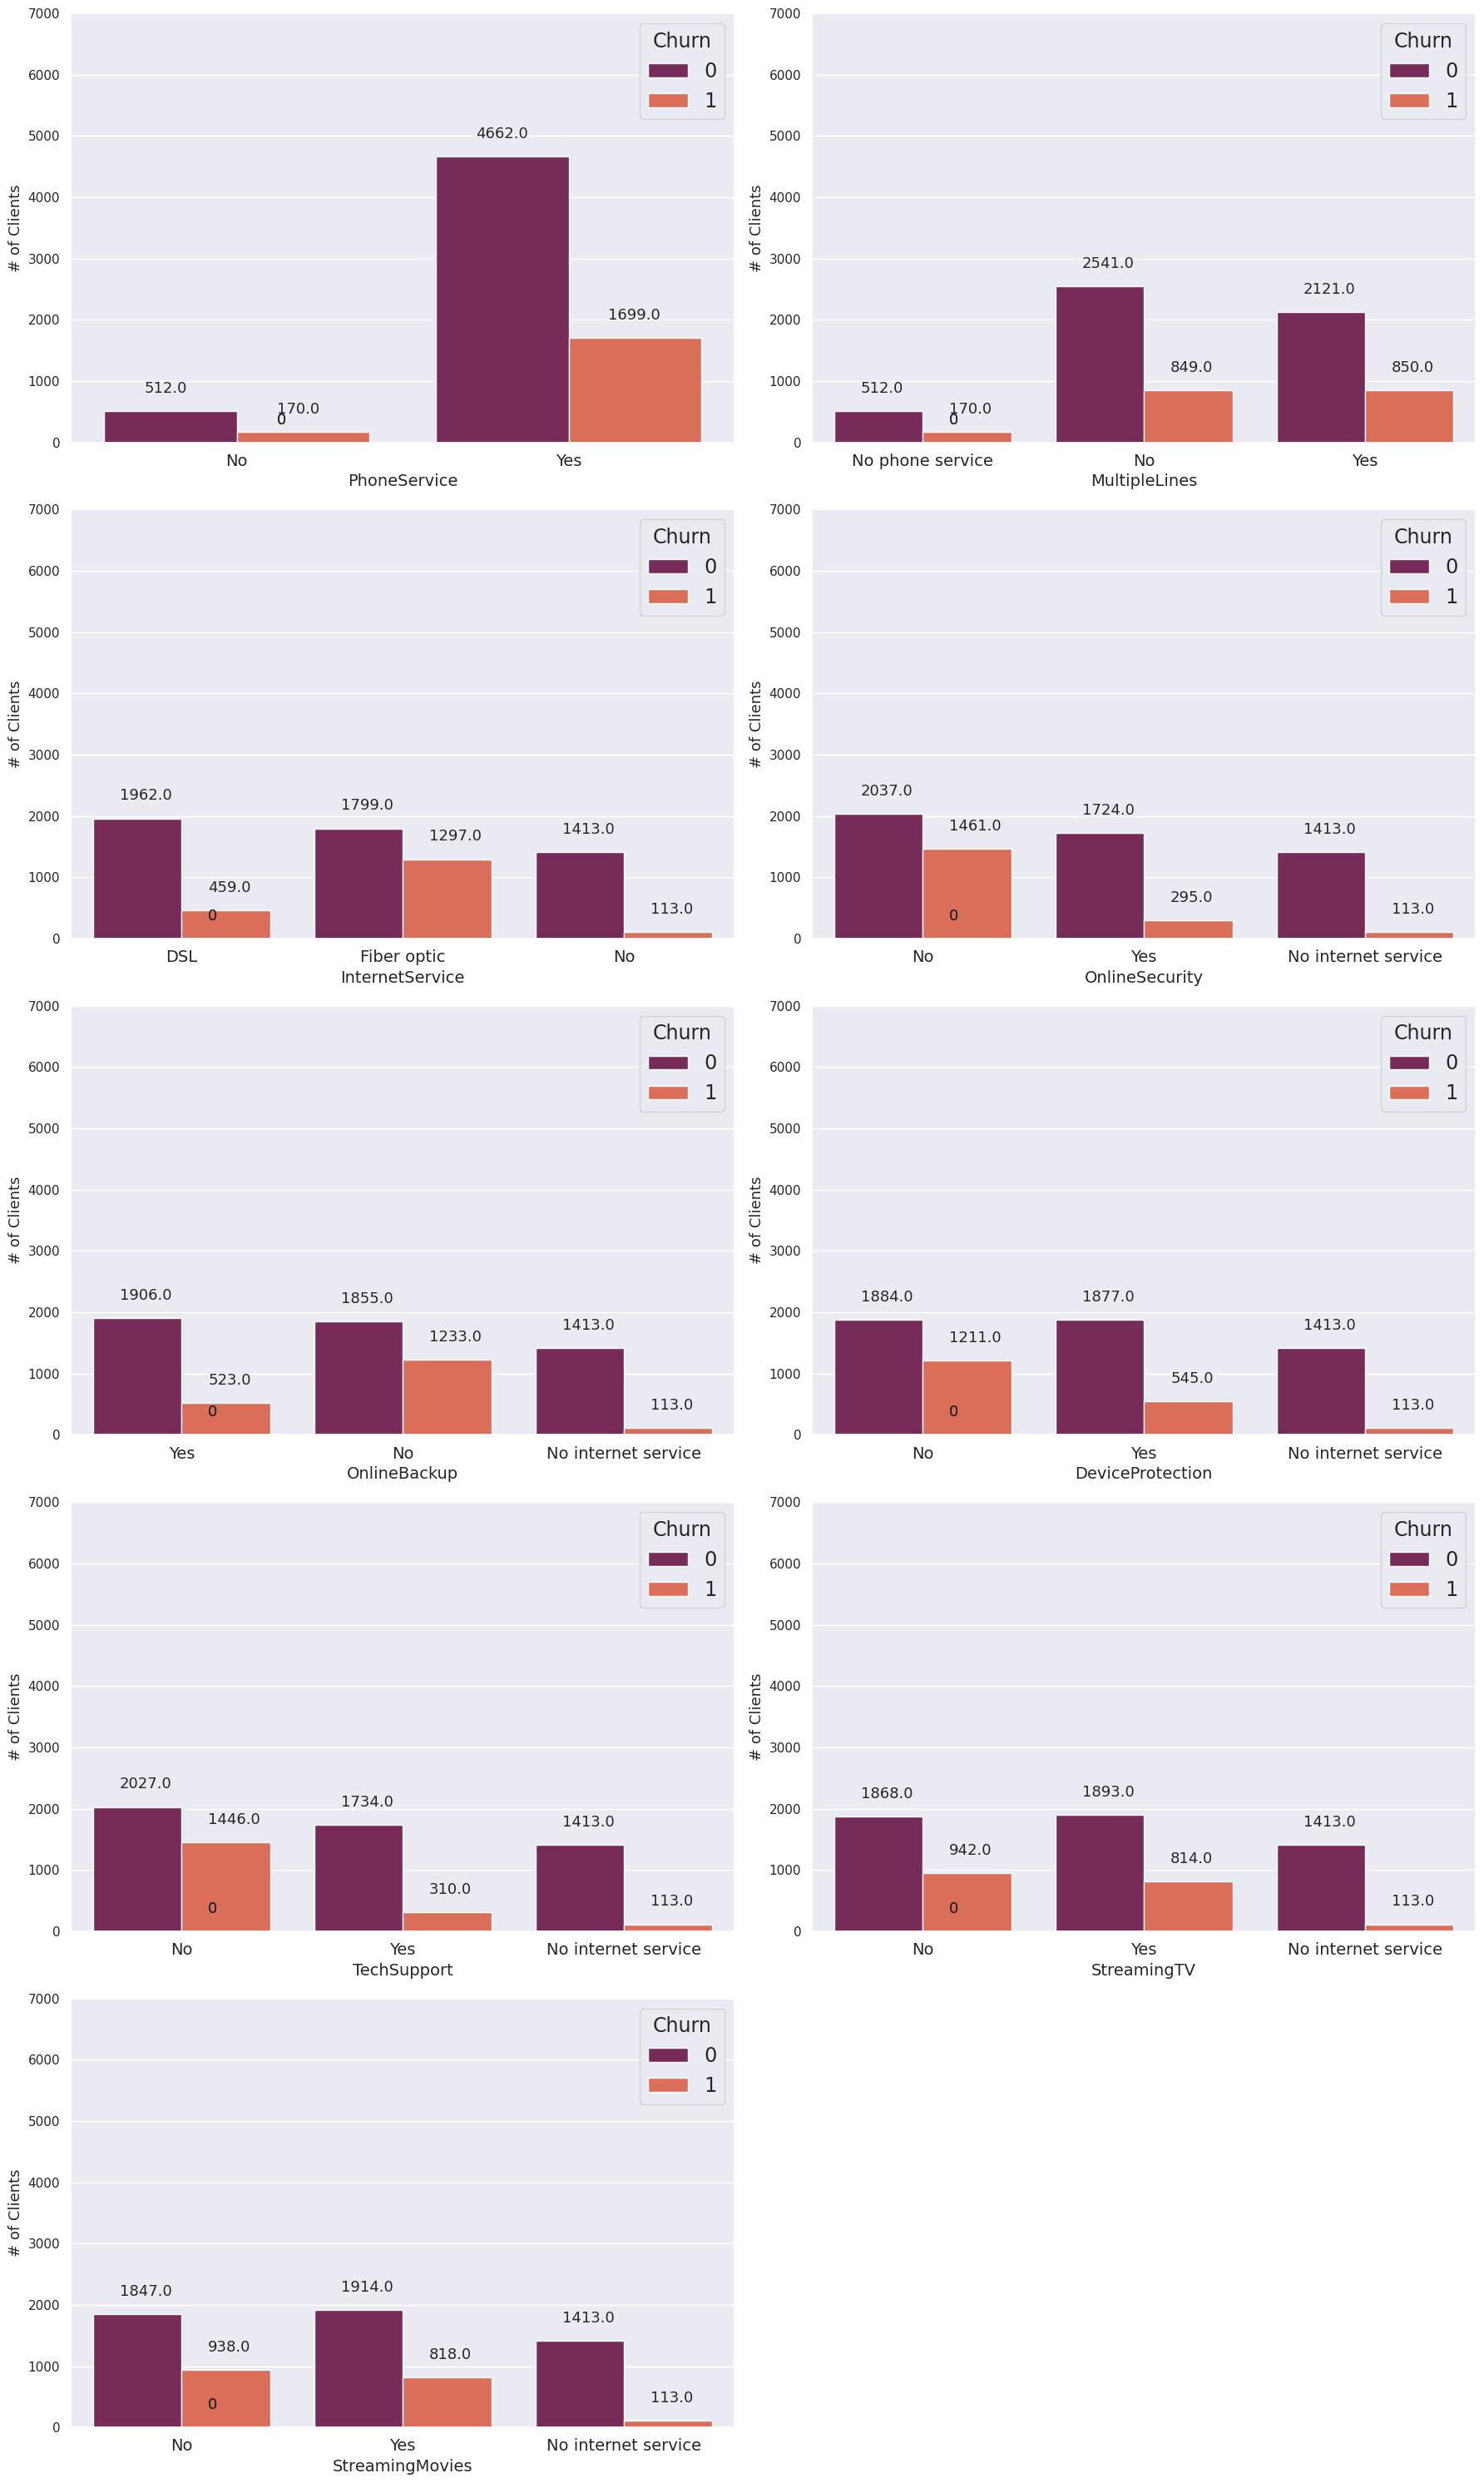

In [48]:
plt.figure(figsize=(18,30))

for i,col in enumerate(serv_features):
    plt.subplot(5,2,i + 1)

    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)

    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+300), fontsize= 13)

plt.tight_layout()

plt.show()

It's interesting to note that, when we exclude customers with numerous lines from the equation, the difference in turnover between those with and without phone services is almost nonexistent. The internet service-related features in this group are the ones that will actually change the game in terms of client retention.

The churn rate in each category of the feature "InternetServices" varies significantly from one to the next. The most likely to stick around as clients are those who don't utilize the company's internet service—presumably, they just use its phone service. Additionally, the chance of DSL service users leaving is lower than the total probability.

With over 40% of churn, fiber optic internet users have the highest percentage. Although fiber optic internet is typically quicker than DSL, the cost of a fiber optic subscription is typically higher as well. Even though we don't know the exact cost of each service, we can at least determine the average monthly cost for each type of internet service to get a general notion of this.

In [49]:
df.groupby(by=['InternetService'])['MonthlyCharges'].mean().sort_values()

InternetService
No             21.079194
DSL            58.102169
Fiber optic    91.500129
Name: MonthlyCharges, dtype: float64

As anticipated, there are notable differences in the average costs for each service, with fiber optic being the most costly. It's difficult to make firm judgments in the absence of more details, but it appears that their fiber optic service's cost-benefit ratio is far from compelling enough to keep clients.

Such a high percentage of customer turnover could be a sign that the quickness and/or dependability of their service is lacking. It is essential to examine complaints that their customer support call center receives in order to glean precise and helpful information about their website. Another way to identify the issue and assist in determining the best course of action is to conduct a survey with a sizable sample of consumers to find out how they feel about the quality of the service.

Regarding the other services, clients who use them all are actually less likely to churn than those who don't. The streaming services exhibit lesser differences than "TechSupport" and "OnlineSecurity," which have bigger differences.

Let's figure out how much each category of the Tech Support and Online Security features costs on average each month.

In [50]:
print(df.groupby(by=['TechSupport'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['OnlineSecurity'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['OnlineSecurity', 'TechSupport'])['MonthlyCharges'].mean().sort_values())

TechSupport
No internet service    21.079194
No                     74.586683
Yes                    80.680137
Name: MonthlyCharges, dtype: float64 

OnlineSecurity
No internet service    21.079194
No                     75.693067
Yes                    78.838732
Name: MonthlyCharges, dtype: float64 

OnlineSecurity       TechSupport        
No internet service  No internet service    21.079194
No                   No                     74.188367
Yes                  No                     75.692011
No                   Yes                    79.758148
Yes                  Yes                    81.472930
Name: MonthlyCharges, dtype: float64


The subscription costs don't appear to be significantly impacted by either service. The company could either lower the additional subscription fee for those extra services or just eliminate that fee and offer those services as standard for internet customers for a trial period if they are able to quantify the cost of providing each service per customer and discover that it is relatively small. It's feasible that using this method could increase profits over time because the majority of customers don't subscribe to those services and because they have a big influence on client retention.

When clients have access to both services, let's examine if the churn rate drops noticeably.

In [51]:
print(df.groupby(by=['TechSupport'])['OnlineSecurity'].value_counts(), '\n')


TechSupport          OnlineSecurity     
No                   No                     2553
                     Yes                     920
No internet service  No internet service    1526
Yes                  Yes                    1099
                     No                      945
Name: OnlineSecurity, dtype: int64 



<ipython-input-52-76d647847fc1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "TechSupport", y = "Churn", hue = "OnlineSecurity", data = df, palette = 'rocket', ci = None)


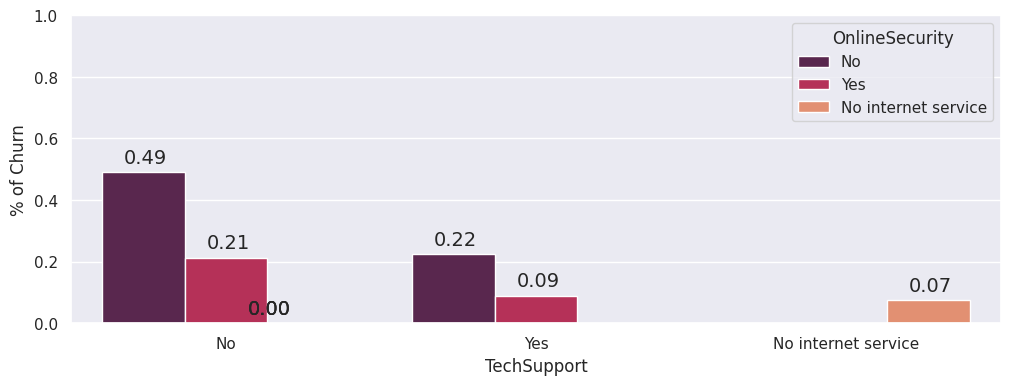

In [52]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "TechSupport", y = "Churn", hue = "OnlineSecurity", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,1.0)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.070, p.get_height()+0.03),fontsize=14)

plt.show()


The variations in churn rates are rather substantial. Customers who utilize both of those services have a lower churn rate than 10%, which supports the prior statement. Those who don't use either of those services have a nearly 50% chance of leaving.

**Account Info Features(categorical)**


<ipython-input-53-7ecb06ffad89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = col, palette = 'rocket')
<ipython-input-53-7ecb06ffad89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = col, palette = 'rocket')
<ipython-input-53-7ecb06ffad89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = col, palette = 'rocket')


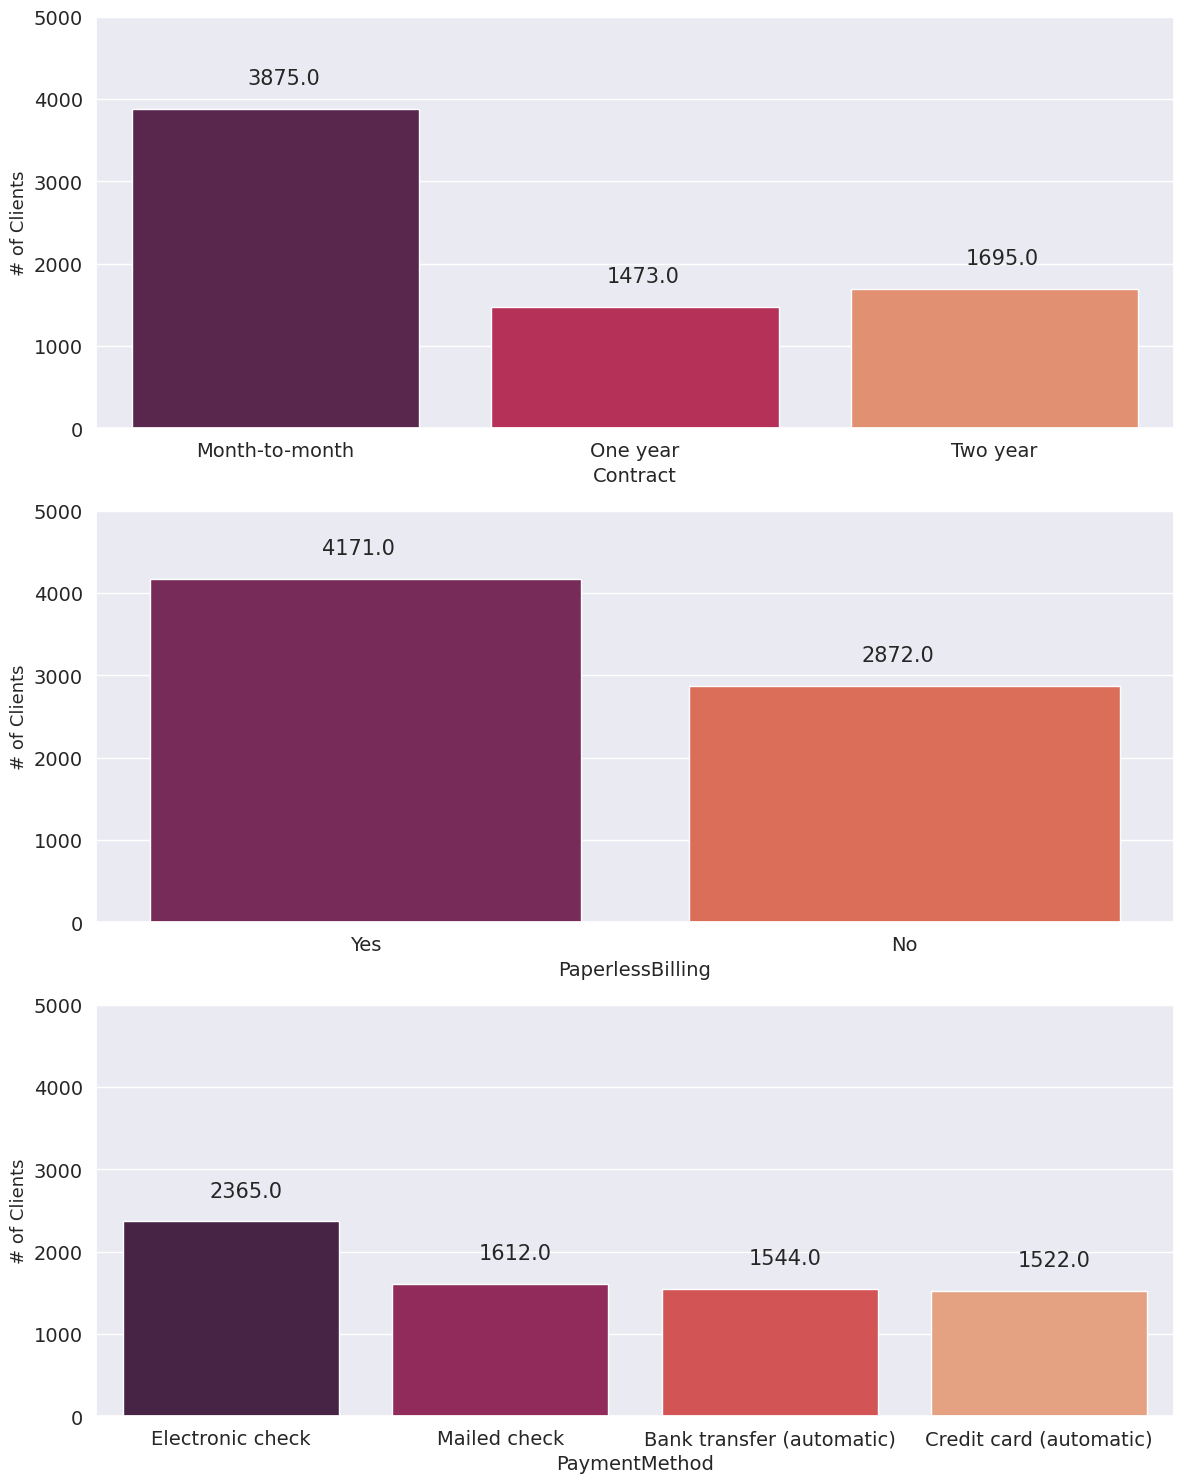

In [53]:
plt.figure(figsize=(12,15))

for i,col in enumerate(cat_accinfo_features):
    plt.subplot(3,1,i + 1)

    ax = sns.countplot(data = df, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 15)

plt.tight_layout()

plt.show()

Naturally, the "month-to-month" contract type, which is also the most common, has the highest contract turnover rate. The high rate of customer attrition from those who select paperless billing and electronic checks as their payment method looks strange. For example, it's possible that the majority of the clients under the month-to-month agreement also fit into those groups. We are able to verify that.

In [54]:
print(df.groupby(by=['Contract'])['PaperlessBilling'].value_counts(normalize = True),' \n')
print(df.groupby(by=['Contract'])['PaymentMethod'].value_counts(normalize = True))

Contract        PaperlessBilling
Month-to-month  Yes                 0.667355
                No                  0.332645
One year        Yes                 0.543109
                No                  0.456891
Two year        No                  0.536873
                Yes                 0.463127
Name: PaperlessBilling, dtype: float64  

Contract        PaymentMethod            
Month-to-month  Electronic check             0.477419
                Mailed check                 0.230452
                Bank transfer (automatic)    0.152000
                Credit card (automatic)      0.140129
One year        Credit card (automatic)      0.270197
                Bank transfer (automatic)    0.265445
                Electronic check             0.235574
                Mailed check                 0.228785
Two year        Credit card (automatic)      0.342773
                Bank transfer (automatic)    0.332743
                Mailed check                 0.225369
                Ele

The dataset can be grouped by contract to reveal that a higher proportion of "month-to-month" type clients pay their bills electronically rather than receiving them in the mail. This, however, doesn't seem to be sufficient to explain why there is such a high turnover rate in certain categories. Regardless of the kind of contract, there's a fair probability we'll find larger percentages of churn in them. See you later.

<ipython-input-55-7f577a21ad7d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "PaperlessBilling", y = "Churn", hue = "Contract", data = df, palette = 'rocket', ci = None)


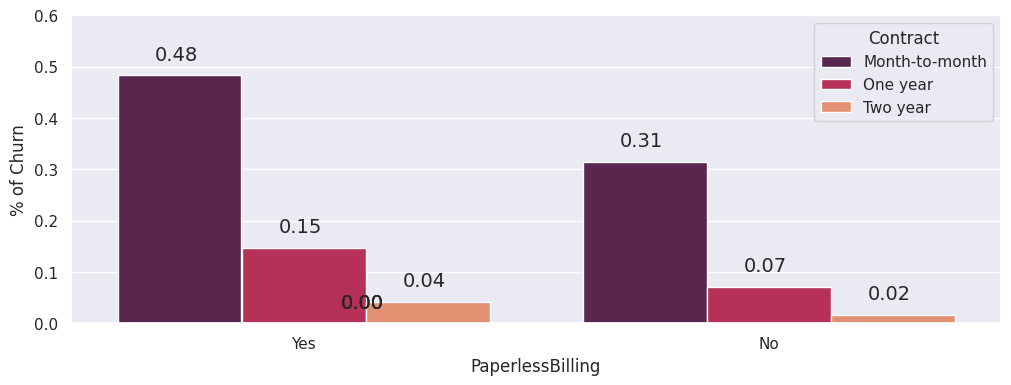

In [55]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "PaperlessBilling", y = "Churn", hue = "Contract", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.6)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.08, p.get_height()+0.03),fontsize=14)

plt.show()

Regardless of the type of contract, those categories really have a higher chance of churn. Without more details or subject expertise, I find it difficult to draw a connection between the attrition rate and how customers get their bills and decide whether to pay them. It is more likely that those two characteristics have many associations. There may be some association between the internet service and each of its categories, given the significant variations in churn rates among them.

In [56]:
print(df.groupby(by=['InternetService'])['PaperlessBilling'].value_counts(normalize = True), '\n')
print(df.groupby(by=['InternetService'])['PaymentMethod'].value_counts(normalize = True))

InternetService  PaperlessBilling
DSL              Yes                 0.549360
                 No                  0.450640
Fiber optic      Yes                 0.773579
                 No                  0.226421
No               No                  0.707733
                 Yes                 0.292267
Name: PaperlessBilling, dtype: float64 

InternetService  PaymentMethod            
DSL              Electronic check             0.267658
                 Mailed check                 0.253201
                 Credit card (automatic)      0.245353
                 Bank transfer (automatic)    0.233788
Fiber optic      Electronic check             0.515181
                 Bank transfer (automatic)    0.208656
                 Credit card (automatic)      0.192829
                 Mailed check                 0.083333
No               Mailed check                 0.485583
                 Bank transfer (automatic)    0.217562
                 Credit card (automatic)      0.216907
 

Among our grouping operations, the following stand out:

Clients with Internet access = "No" Less than 30% of people receive paperless bills, and just 8% use electronic checks to make payments;
Consumers using "Fiber Optic" Internet service receive paperless bills (77%), and 51% of them pay with electronic checks.
It is worth noting that consumers who do not utilize Telco's internet have the lowest churn rate in the internet services feature, whereas those who use fiber optic internet have the highest. Thus, it can be concluded that those findings are not unexpected.

It is important to note that while we shouldn't draw the conclusion that the manner invoices are received or how payments are made directly affects client retention, those details will undoubtedly be helpful to our prediction models.

**Account Info Features(numerical)**

<ipython-input-57-f8a2af7e1d33>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,col])
<ipython-input-57-f8a2af7e1d33>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,col])
<ipython-input-57-f8a2af7e1d33>:5: UserWarning: 

`distplot` is a deprecated function and will be remove

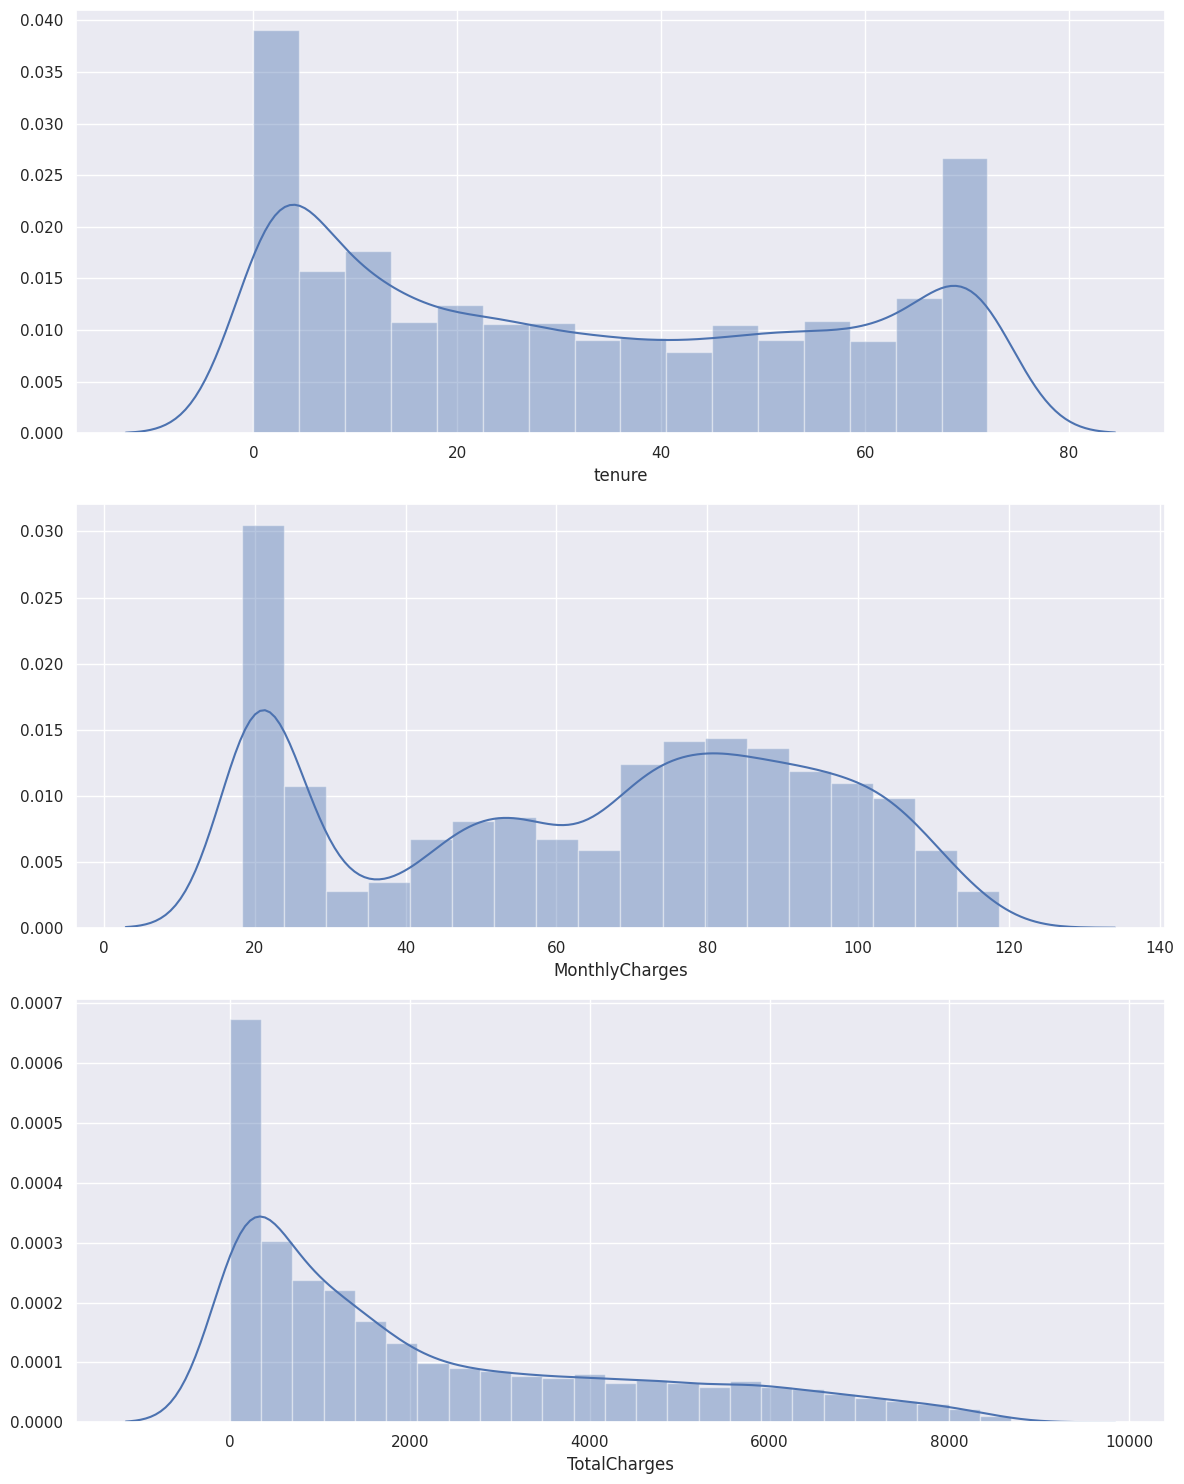

In [57]:
plt.figure(figsize=(12,15))

for i,col in enumerate(num_accinfo_features):
    plt.subplot(3,1,i + 1)
    sns.distplot(df.loc[:,col])
    #plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation
    plt.ylabel('')
    plt.tight_layout()

plt.show()

<ipython-input-58-7c348cf29d05>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['Churn'] == 0), col], label = 'No Churn', shade = True)
<ipython-input-58-7c348cf29d05>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['Churn'] == 1), col], label = 'Churn', shade = True)
<ipython-input-58-7c348cf29d05>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[(df['Churn'] == 0), col], label = 'No Churn', shade = True)
<ipython-input-58-7c348cf29d05>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your cod

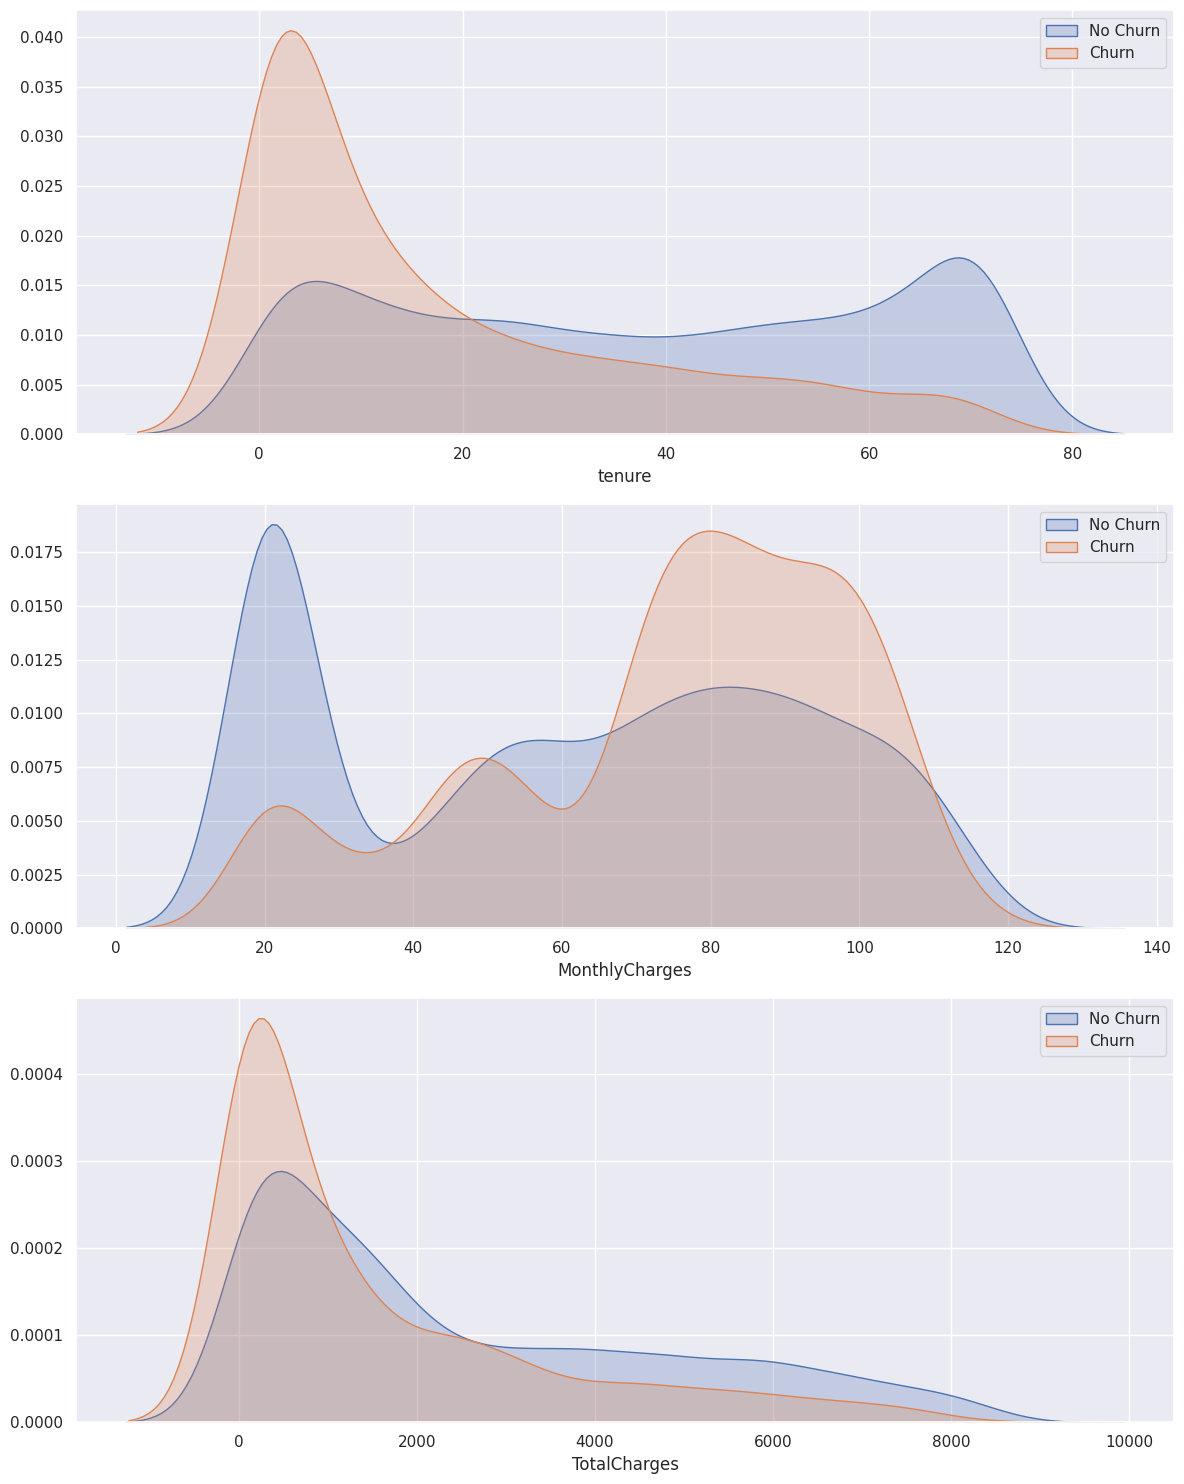

In [58]:
plt.figure(figsize=(12,15))

for i,col in enumerate(num_accinfo_features):
    plt.subplot(3,1,i + 1)
    sns.kdeplot(df.loc[(df['Churn'] == 0), col], label = 'No Churn', shade = True)
    sns.kdeplot(df.loc[(df['Churn'] == 1), col], label = 'Churn', shade = True)
    plt.legend()
    plt.ylabel('')
    plt.tight_layout()

plt.show()

What each feature allows us to see is:


*   Tenure: The first few months have a high percentage of churned customers.

*   Monthly Charges: Higher values (about 60 and beyond) have a large concentration of churned customers.

*   Total Charges: The distributions are fairly similar, except the values in the "No churn" distribution are smaller.

To strengthen our analysis, let's obtain the mean values.

In [59]:
print(df.groupby(by=['Churn'])['tenure'].mean().sort_values(), '\n')
print(df.groupby(by=['Churn'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['Churn'])['TotalCharges'].mean().sort_values())

Churn
1    17.979133
0    37.569965
Name: tenure, dtype: float64 

Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64 

Churn
1    1531.796094
0    2549.911442
Name: TotalCharges, dtype: float64


As anticipated, when comparing the same numbers for retained customers, the average tenure period for churned customers is lower and the average monthly charges are greater. Customers that have churned off typically pay less overall, which is most likely because of their shorter stay.

In the initial months, there was a high concentration, according to the density plot for churned consumers in the "tenure" feature. To get the churn rate each year of service, let's divide this feature into bins.

In [60]:
df['tenure_bin'] = pd.cut(df['tenure'],[-1,12,24,36,48,60,100])
df['tenure_bin'].value_counts(sort = False)

(-1, 12]     2186
(12, 24]     1024
(24, 36]      832
(36, 48]      762
(48, 60]      832
(60, 100]    1407
Name: tenure_bin, dtype: int64

<ipython-input-61-ba8f642a5cc9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "tenure_bin", y = "Churn", data = df, palette = 'rocket', ci = None)
<ipython-input-61-ba8f642a5cc9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "tenure_bin", y = "Churn", data = df, palette = 'rocket', ci = None)


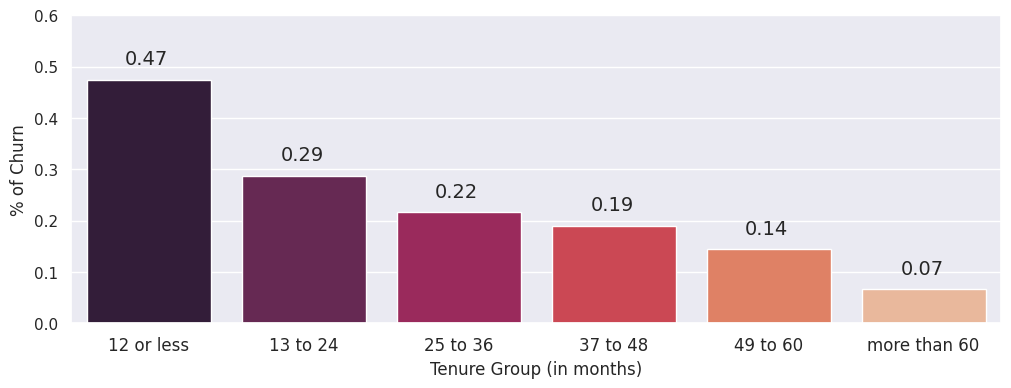

In [61]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "tenure_bin", y = "Churn", data = df, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.6)
plt.xticks([0,1,2,3,4,5], ['12 or less', '13 to 24', '25 to 36', '37 to 48', '49 to 60', 'more than 60'], fontsize = 12)
plt.xlabel("Tenure Group (in months)", fontsize= 12)



for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=14)

plt.show()

**Conclusion**

Almost half of those who used the company's services for a year or less eventually stopped doing so. For certain kinds of businesses, it's normal to have a greater churn rate within the first year or two. However, a high churn rate in the first year suggests that the quality of the services offered falls short of what their new clients are expecting.